# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in decimal format upto 3 decimals instead of scientific notation


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('trip/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('C:\\Users\\ASUS\\AIML_Upgrad\\AIML New\\Assignment EDA\\trip')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_curr = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = df_curr.groupby([df_curr.tpep_pickup_datetime.dt.day, df_curr.tpep_pickup_datetime.dt.hour]).sample(frac = 0.05, random_state = 42)
        df = pd.concat([df, sampled_data], ignore_index=True)

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
#        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [15]:
# Store the df in csv/parquet
df.to_parquet('groupbySample.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [21]:
# Load the new data file
data = pd.read_parquet('groupbySample.parquet')

In [23]:
data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17            2.000   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12            4.000   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52            1.000   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20            2.000   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          2.850       1.000                  N           263            41   
1          1.320       1.000                  N            90           137   
2          3.170       1.000                  N            79           141   
3          3.800       1.000                  N           142           107   
4          7.970         NaN               None           140            17   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1       15.600  1.000    0.500       4.120         0.000   
1             1       12.800  1.000    0.500       3.560         0.000   
2             1       14.900  1.000    0.500       3.980         0.000   
3             2       24.700  1.000    0.500       0.000         0.000   
4             0       36.830  0.000    0.500       8.170         0.000   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                  1.000        24.720                 2.500        0.000   
1                  1.000        21.360                 2.500        0.000   
2                  1.000        23.880                 2.500        0.000   
3                  1.000        29.700                 2.500        0.000   
4                  1.000        49.000                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [27]:
# Fix the index and drop any columns that are not needed
data.reset_index(drop = True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:31:50   2023-01-01 00:44:17            2.000   
1               2  2023-01-01 00:10:50   2023-01-01 00:24:12            4.000   
2               2  2023-01-01 00:25:37   2023-01-01 00:34:52            1.000   
3               2  2023-01-01 00:27:26   2023-01-01 00:52:20            2.000   
4               2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   
...           ...                  ...                   ...              ...   
1896415         2  2023-09-30 23:14:40   2023-09-30 23:35:31            1.000   
1896416         2  2023-09-30 23:23:52   2023-09-30 23:50:41            1.000   
1896417         2  2023-09-30 23:55:13   2023-10-01 00:01:10            1.000   
1896418         2  2023-09-30 23:46:04   2023-09-30 23:50:11            1.000   
1896419         2  2023-08-31 23:59:58   2023-09-01 00:15:27            1.000   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                2.850       1.000                  N           263   
1                1.320       1.000                  N            90   
2                3.170       1.000                  N            79   
3                3.800       1.000                  N           142   
4                7.970         NaN               None           140   
...                ...         ...                ...           ...   
1896415          2.800       1.000                  N           249   
1896416          5.680       1.000                  N           164   
1896417          0.830       1.000                  N           231   
1896418          0.550       1.000                  N            90   
1896419          2.840       1.000                  N           162   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                  41             1       15.600  1.000    0.500       4.120   
1                 137             1       12.800  1.000    0.500       3.560   
2                 141             1       14.900  1.000    0.500       3.980   
3                 107             2       24.700  1.000    0.500       0.000   
4                  17             0       36.830  0.000    0.500       8.170   
...               ...           ...          ...    ...      ...         ...   
1896415            50             1       19.100  1.000    0.500       2.000   
1896416           256             1       28.900  1.000    0.500       6.780   
1896417           231             1        7.900  1.000    0.500       1.000   
1896418           249             1        5.800  1.000    0.500       1.000   
1896419           144             1       17.000  1.000    0.500       4.400   

         tolls_amount  improvement_surcharge  total_amount  \
0               0.000                  1.000        24.720   
1               0.000                  1.000        21.360   
2               0.000                  1.000        23.880   
3               0.000                  1.000        29.700   
4               0.000                  1.000        49.000   
...               ...                    ...           ...   
1896415         0.000                  1.000        26.100   
1896416         0.000                  1.000        40.680   
1896417         0.000                  1.000        13.900   
1896418         0.000                  1.000        11.800   
1896419         0.000                  1.000        26.400   

         congestion_surcharge  airport_fee  Airport_fee  
0                       2.500        0.000          NaN  
1                       2.500        0.000          NaN  
2                       2.500        0.000          NaN  
3                       2.500        0.000          NaN  
4                         NaN          NaN          NaN  
...                       ...          ...          ...  
1896415                 2.500          NaN        0.000  
1896416      

In [29]:
data.index # checking the index for confirmation

RangeIndex(start=0, stop=1896420, step=1)

##### <font color = green>we don't need the flag value store_and_fwd_flag for our analysis purpose. </font> <br>

In [32]:
data = data.drop('store_and_fwd_flag', axis=1) # drop the store_and_fwd_flag column

In [34]:
data.columns # checking column name

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [36]:
data['Airport_fee'].isna().sum() #No. of NA values

213438

In [38]:
data['airport_fee'].isna().sum() # No. of NA values

1748009

##### <font color = green>column "Airport_fee" is major column(lesser number of NA), filling values from column airport_fee into Airport_fee. </font> <br>

In [41]:
# Combine the two airport fee columns
data["airportFee"] = data["Airport_fee"].fillna(data["airport_fee"])

In [43]:
data["airportFee"].isna().sum() # Check the null values after combining 

65027

In [45]:
data.drop(columns=['Airport_fee','airport_fee'], inplace=True) #drop the columns not required.

In [47]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airportFee'],
      dtype='object')

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [49]:
# check where values of fare amount are negative
data[data.fare_amount < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airportFee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
# No records with negative fare amount

##### <font color = green> No records with negative fare amount </font> <br>

In [54]:
# Find which columns have negative values
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airportFee'],
      dtype='object')

In [56]:
without_time = data.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime"], axis = 1)
neg = without_time[without_time < 0].count()

In [58]:
neg

VendorID                  0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     2
mta_tax                  80
tip_amount                0
tolls_amount              0
improvement_surcharge    88
total_amount             88
congestion_surcharge     57
airportFee               25
dtype: int64

#### checking columns with negative values

In [61]:
neg_col = neg[neg>0].index.to_list()

In [63]:
neg = data.query('extra<0 or mta_tax<0 or improvement_surcharge<0 or total_amount<0 or congestion_surcharge<0 or airportFee < 0')
neg[neg_col]

extra  mta_tax  improvement_surcharge  total_amount  \
4505     0.000   -0.500                 -1.000        -4.000   
24150    0.000   -0.500                 -1.000        -4.000   
32923    0.000   -0.500                 -1.000        -5.250   
44734    0.000   -0.500                 -1.000        -4.000   
50105    0.000   -0.500                 -1.000        -2.750   
...        ...      ...                    ...           ...   
1779324  0.000   -0.500                 -1.000        -4.000   
1798504  0.000   -0.500                 -1.000        -4.000   
1829800  0.000   -0.500                 -1.000        -3.250   
1844332  0.000   -0.500                 -1.000        -4.000   
1869214  0.000   -0.500                 -1.000        -4.000   

         congestion_surcharge  airportFee  
4505                   -2.500       0.000  
24150                  -2.500       0.000  
32923                  -2.500      -1.250  
44734                  -2.500       0.000  
50105                   0.000      -1.250  
...                       ...         ...  
1779324                -2.500       0.000  
1798504                -2.500       0.000  
1829800                 0.000      -1.750  
1844332                -2.500       0.000  
1869214                -2.500       0.000  

[88 rows x 6 columns]

In [65]:
data[neg_col] = data[neg_col].apply(lambda x : abs(x)) #fixing negative values

In [67]:
(data[data[neg_col]<0] ).count() #verifying negative values

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airportFee               0
dtype: int64

In [69]:
# fix these negative values
#recalculating fare total amount after correcting all negative values
data["totalAmount"] = data[["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "congestion_surcharge", "airportFee"]].sum(axis = 1)

In [71]:
data.drop("total_amount", axis = 1, inplace= True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896420 entries, 0 to 1896419
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  congestion_surcharge   float64       
 16  airportFee             float64       
 17  totalAmount            float64       
dtypes: datetime64[us](2), 

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [77]:
# Find the proportion of missing values in each column
data.isnull().mean()*100

VendorID                0.000
tpep_pickup_datetime    0.000
tpep_dropoff_datetime   0.000
passenger_count         3.429
trip_distance           0.000
RatecodeID              3.429
PULocationID            0.000
DOLocationID            0.000
payment_type            0.000
fare_amount             0.000
extra                   0.000
mta_tax                 0.000
tip_amount              0.000
tolls_amount            0.000
improvement_surcharge   0.000
congestion_surcharge    3.429
airportFee              3.429
totalAmount             0.000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [79]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
data[data.passenger_count.isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   
6               2  2023-01-01 00:39:50   2023-01-01 00:54:29              NaN   
8               2  2023-01-01 00:43:47   2023-01-01 00:56:12              NaN   
17              2  2023-01-01 00:33:00   2023-01-01 01:01:00              NaN   
26              2  2023-01-01 00:33:00   2023-01-01 00:57:00              NaN   
...           ...                  ...                   ...              ...   
1896326         1  2023-09-30 23:04:36   2023-09-30 23:24:55              NaN   
1896343         1  2023-09-30 23:45:00   2023-10-01 00:01:55              NaN   
1896383         1  2023-09-30 23:06:26   2023-09-30 23:24:40              NaN   
1896391         2  2023-09-30 23:46:01   2023-10-01 00:02:31              NaN   
1896408         1  2023-09-30 23:56:26   2023-10-01 00:02:37              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                7.970         NaN           140            17             0   
6                7.530         NaN           213             7             0   
8                5.360         NaN            88           229             0   
17               6.900         NaN            45           188             0   
26               5.110         NaN           255           229             0   
...                ...         ...           ...           ...           ...   
1896326          0.000         NaN           181            36             0   
1896343          0.000         NaN            90            50             0   
1896383          0.000         NaN            87           186             0   
1896391          3.050         NaN           239            68             0   
1896408          0.000         NaN           211           158             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4             36.830  0.000    0.500       8.170         0.000   
6             30.970  0.000    0.500       4.000         6.550   
8             24.510  0.000    0.500       4.280         0.000   
17            33.490  0.000    0.500       2.000         0.000   
26            24.040  0.000    0.500       5.610         0.000   
...              ...    ...      ...         ...           ...   
1896326       26.100  0.000    0.500       0.000         0.000   
1896343       21.030  0.000    0.500       0.000         0.000   
1896383       25.800  0.000    0.500       0.000         0.000   
1896391       18.470  0.000    0.500       0.000         0.000   
1896408       14.830  0.000    0.500       0.000         0.000   

         improvement_surcharge  congestion_surcharge  airportFee  totalAmount  
4                        1.000                   NaN         NaN       46.500  
6                        1.000                   NaN         NaN       43.020  
8                        1.000                   NaN         NaN       30.290  
17                       1.000                   NaN         NaN       36.990  
26                       1.000                   NaN         NaN       31.150  
...                        ...                   ...         ...          ...  
1896326                  1.000                   NaN         NaN       27.600  
1896343                  1.000                   NaN         NaN       22.530  
1896383                  1.000                   NaN         NaN       27.300  
1896391                  1.000                   NaN         NaN       19.970  
1896408                  1.000                   NaN         NaN       16.330  

[65027 rows x 18 columns]

Did you find zeroes in passenger_count? Handle these.

In [81]:
data.passenger_count.value_counts()

passenger_count
1.000    1377537
2.000     276925
3.000      68843
4.000      39145
0.000      29182
5.000      24150
6.000      15593
8.000         10
7.000          6
9.000          2
Name: count, dtype: int64

In [83]:
data.passenger_count.fillna(data.passenger_count.mode()[0], inplace=True) #replacing null values with max frequency

In [85]:
data.passenger_count.isnull().sum()

0

In [87]:
# remove data points where passenger count is zero.
data = data[data.passenger_count > 0]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [89]:
data.RatecodeID.isnull().sum()

65027

In [91]:
data.RatecodeID.describe()

count   1802211.000
mean          1.658
std           7.539
min           1.000
25%           1.000
50%           1.000
75%           1.000
max          99.000
Name: RatecodeID, dtype: float64

In [93]:
# Fix missing values in 'RatecodeID'
data.RatecodeID.value_counts()

RatecodeID
1.000     1699901
2.000       71676
99.000      10717
5.000       10298
3.000        5854
4.000        3763
6.000           2
Name: count, dtype: int64

In [95]:
data.RatecodeID.fillna(data.RatecodeID.mode()[0], inplace=True) #replacing null values with max frequency

In [97]:
data.RatecodeID.isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [99]:
# handle null values in congestion_surcharge
data.congestion_surcharge.value_counts()

congestion_surcharge
2.500    1663746
0.000     138465
Name: count, dtype: int64

In [101]:
data.congestion_surcharge.describe()

count   1802211.000
mean          2.308
std           0.666
min           0.000
25%           2.500
50%           2.500
75%           2.500
max           2.500
Name: congestion_surcharge, dtype: float64

In [103]:
# replace null values with median 
data.congestion_surcharge.fillna(data.congestion_surcharge.median(), inplace=True)

In [105]:
data.congestion_surcharge.isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [107]:
# Handle any remaining missing values
data.isnull().mean()*100 # airportFee has null value

VendorID                0.000
tpep_pickup_datetime    0.000
tpep_dropoff_datetime   0.000
passenger_count         0.000
trip_distance           0.000
RatecodeID              0.000
PULocationID            0.000
DOLocationID            0.000
payment_type            0.000
fare_amount             0.000
extra                   0.000
mta_tax                 0.000
tip_amount              0.000
tolls_amount            0.000
improvement_surcharge   0.000
congestion_surcharge    0.000
airportFee              3.483
totalAmount             0.000
dtype: float64

In [109]:
data.airportFee.describe()

count   1802211.000
mean          0.145
std           0.467
min           0.000
25%           0.000
50%           0.000
75%           0.000
max           1.750
Name: airportFee, dtype: float64

In [111]:
data.airportFee.value_counts()

airportFee
0.000    1642035
1.750     120481
1.250      39695
Name: count, dtype: int64

In [113]:
data[data.airportFee == 1.75].describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 120481.000                      120481                      120481   
mean       1.802  2023-08-18 01:55:17.867879  2023-08-18 02:34:09.456304   
min        1.000         2001-01-01 00:08:31         2001-01-01 16:01:27   
25%        2.000         2023-06-11 22:06:55         2023-06-11 22:46:29   
50%        2.000         2023-08-19 11:14:24         2023-08-19 12:01:14   
75%        2.000         2023-10-23 22:01:02         2023-10-23 22:28:23   
max        2.000         2023-12-31 23:55:39         2024-01-01 00:18:06   
std        0.399                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count       120481.000     120481.000  120481.000    120481.000    120481.000   
mean             1.462         13.290       1.408       132.617       152.620   
min              1.000          0.000       1.000         4.000         1.000   
25%              1.000          9.000       1.000       132.000        90.000   
50%              1.000         11.890       1.000       132.000       161.000   
75%              2.000         17.910       2.000       138.000       230.000   
max              8.000       9683.300       5.000       265.000       265.000   
std              0.894         28.584       0.695        15.039        74.297   

       payment_type  fare_amount      extra    mta_tax  tip_amount  \
count    120481.000   120481.000 120481.000 120481.000  120481.000   
mean          1.256       55.092      3.624      0.492       8.860   
min           1.000        0.000      0.000      0.000       0.000   
25%           1.000       40.100      0.000      0.500       0.000   
50%           1.000       54.100      4.250      0.500      10.000   
75%           1.000       70.000      6.000      0.500      14.650   
max           4.000      824.800     14.250      0.500     168.150   
std           0.518       24.620      3.110      0.063       7.276   

       tolls_amount  improvement_surcharge  congestion_surcharge  airportFee  \
count    120481.000             120481.000            120481.000  120481.000   
mean          3.940                  1.000                 1.405       1.750   
min           0.000                  0.000                 0.000       1.750   
25%           0.000                  1.000                 0.000       1.750   
50%           6.550                  1.000                 2.500       1.750   
75%           6.940                  1.000                 2.500       1.750   
max          83.550                  1.000                 2.500       1.750   
std           3.787                  0.012                 1.240       0.000   

       totalAmount  
count   120481.000  
mean        76.162  
min          2.750  
25%         61.000  
50%         77.230  
75%         92.690  
max        834.100  
std         29.137

In [115]:
# replace null values with mode
data.airportFee.fillna(data.airportFee.mode()[0], inplace=True)

In [117]:
data.airportFee.isnull().sum()

0

In [119]:
data.isnull().mean()*100 

VendorID                0.000
tpep_pickup_datetime    0.000
tpep_dropoff_datetime   0.000
passenger_count         0.000
trip_distance           0.000
RatecodeID              0.000
PULocationID            0.000
DOLocationID            0.000
payment_type            0.000
fare_amount             0.000
extra                   0.000
mta_tax                 0.000
tip_amount              0.000
tolls_amount            0.000
improvement_surcharge   0.000
congestion_surcharge    0.000
airportFee              0.000
totalAmount             0.000
dtype: float64

In [121]:
# Re-calculating total_amoumt after adjusting null values
data["totalAmount"] = data[["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "congestion_surcharge", "airportFee"]].sum(axis = 1)

In [123]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airportFee', 'totalAmount'],
      dtype='object')

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [125]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
data.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count 1867238.000                     1867238                     1867238   
mean        1.747  2023-07-02 23:43:57.578782  2023-07-03 00:01:27.462515   
min         1.000         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%         1.000  2023-04-02 18:11:08.500000  2023-04-02 18:28:47.250000   
50%         2.000         2023-06-27 20:09:52  2023-06-27 20:24:34.500000   
75%         2.000         2023-10-06 23:28:43  2023-10-06 23:45:06.500000   
max         6.000         2024-01-03 18:43:26         2024-01-03 18:43:29   
std         0.440                         NaN                         NaN   

       passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  \
count      1867238.000    1867238.000 1867238.000   1867238.000   1867238.000   
mean             1.378          3.994       1.635       165.209       164.016   
min              1.000          0.000       1.000         1.000         1.000   
25%              1.000          1.050       1.000       132.000       113.000   
50%              1.000          1.800       1.000       162.000       162.000   
75%              1.000          3.420       1.000       234.000       234.000   
max              9.000     143926.360      99.000       265.000       265.000   
std              0.870        173.676       7.408        63.992        69.893   

       payment_type  fare_amount       extra     mta_tax  tip_amount  \
count   1867238.000  1867238.000 1867238.000 1867238.000 1867238.000   
mean          1.162       19.947       1.556       0.495       3.563   
min           0.000        0.000       0.000       0.000       0.000   
25%           1.000        9.300       0.000       0.500       1.000   
50%           1.000       13.500       1.000       0.500       2.850   
75%           1.000       22.600       2.500       0.500       4.450   
max           4.000     1116.700      96.380       5.750     410.000   
std           0.507       18.396       1.822       0.049       4.081   

       tolls_amount  improvement_surcharge  congestion_surcharge  airportFee  \
count   1867238.000            1867238.000           1867238.000 1867238.000   
mean          0.602                  0.999                 2.315       0.139   
min           0.000                  0.000                 0.000       0.000   
25%           0.000                  1.000                 2.500       0.000   
50%           0.000                  1.000                 2.500       0.000   
75%           0.000                  1.000                 2.500       0.000   
max          83.550                  1.000                 2.500       1.750   
std           2.189                  0.028                 0.655       0.460   

       totalAmount  
count  1867238.000  
mean        29.617  
min          0.000  
25%         16.700  
50%         21.840  
75%         31.560  
max       1123.200  
std         22.982

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

#### <font color = green>Checking passenger count</font> <br>

In [128]:
# remove passenger_count > 6 #checking column passenger_count
data = data[data.passenger_count < 7]


In [130]:
data.passenger_count.value_counts()

passenger_count
1.000    1442564
2.000     276925
3.000      68843
4.000      39145
5.000      24150
6.000      15593
Name: count, dtype: int64

#### <font color = green>Checking VendorID </font> <br>

In [133]:
data.VendorID.value_counts() #checking column VendorID for outliers

VendorID
2    1392910
1     473834
6        476
Name: count, dtype: int64

In [135]:
# VendorID should only include either 1 or 2, hence removing the data with vendorID 6
data = data[~(data.VendorID == 6)]

#### <font color = green>Checking trip_distance</font> <br>

In [138]:
data.trip_distance.describe()

count   1866744.000
mean          3.992
std         173.699
min           0.000
25%           1.050
50%           1.800
75%           3.420
max      143926.360
Name: trip_distance, dtype: float64

In [140]:
data.trip_distance.quantile(0.99)

20.3

##### <font color = green>Maximum trip distance is ~1.4lakh miles while 99 percentile is ~21</font> <br>

In [143]:
data[data.trip_distance >= 125].trip_distance.count()

52

In [145]:
data[data.trip_distance <= 0].trip_distance.count()

35849

##### <font color = green>Hence we can only consider the data points between (0,125) </font> <br>

In [148]:
data = data[data.trip_distance.between(0,125)]

#### <font color = green>Checking RatecodeID</font> <br>

In [151]:
data.RatecodeID.describe()

count   1866692.000
mean          1.635
std           7.408
min           1.000
25%           1.000
50%           1.000
75%           1.000
max          99.000
Name: RatecodeID, dtype: float64

##### <font color = green>RatecodeID should be between (1,6)</font> <br>

In [154]:
data = data[data.RatecodeID.between(1,6)]

#### <font color = green>Checking totalAmount</font> <br>

In [157]:
data.totalAmount.describe()

count   1855977.000
mean         29.570
std          22.978
min           0.000
25%          16.630
50%          21.820
75%          31.500
max        1123.200
Name: totalAmount, dtype: float64

In [160]:
data.totalAmount.quantile(0.99)

104.76

##### <font color = green>set an upper bound for totalAmount at 99th percentile </font> <br>

In [163]:
data = data[data.totalAmount < data.totalAmount.quantile(0.99)]

#### <font color = green>Checking payment_type</font> <br>

In [166]:
data.payment_type.value_counts()

payment_type
1    1442777
2     308721
0      64099
4      13306
3       8244
Name: count, dtype: int64

##### <font color = green>payment_type = 0 should not exist in data points as per business understanding</font> <br>

In [169]:
# removing data where payment_type is 0
data = data[~(data.payment_type == 0)]

#### <font color = green>Checking tip_amount</font> <br>

<Axes: >

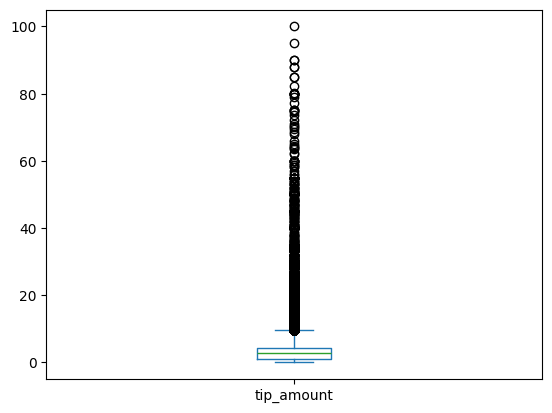

In [172]:
data.tip_amount.plot.box()

##### <font color = green> capping tip amount at maximum 40</font> <br>

In [175]:
data = data[data.tip_amount <= 40]

#### <font color = green>Checking fare_amount</font> <br>

In [180]:
# Continue with outlier handling
data.fare_amount.describe()

count   1772860.000
mean         18.909
std          15.785
min           0.000
25%           9.300
50%          13.500
75%          21.200
max         103.450
Name: fare_amount, dtype: float64

#### <font color = green> checking payment_type for fare_amount zero</font> <br>

In [183]:
data[data.fare_amount == 0].payment_type.value_counts()

payment_type
2    247
4    133
3    110
1    106
Name: count, dtype: int64

#####  <font color = green> keep data points of zero fare amount with valid payment_type i.e.,  No charge, Dispute, Voided trip</font> <br>

In [186]:
data = data[~((data['fare_amount'] == 0) & (~data['payment_type'].isin([3,4,6])))]

#### <font color = green> checking if the data points are of year 2023</font> <br>

In [189]:
data.tpep_pickup_datetime.dt.year.value_counts()

tpep_pickup_datetime
2023    1772502
2001          2
2022          1
2009          1
2024          1
Name: count, dtype: int64

#####  <font color = green> The data should be of year 2023. There are very few data points that belongs to year other than 2023, hence removing them</font> <br>

In [192]:
data = data[data.tpep_pickup_datetime.dt.year == 2023]

In [194]:
data.tpep_pickup_datetime.dt.year.value_counts()

tpep_pickup_datetime
2023    1772502
Name: count, dtype: int64

In [196]:
# Do any columns need standardising?

# Already done with the above steps for handling outliers

In [198]:
# reset index before proceeding to EDA phase
data.reset_index(drop = True)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:31:50   2023-01-01 00:44:17            2.000   
1               2  2023-01-01 00:10:50   2023-01-01 00:24:12            4.000   
2               2  2023-01-01 00:25:37   2023-01-01 00:34:52            1.000   
3               2  2023-01-01 00:27:26   2023-01-01 00:52:20            2.000   
4               1  2023-01-01 00:55:02   2023-01-01 00:59:57            1.000   
...           ...                  ...                   ...              ...   
1772497         2  2023-09-30 23:14:40   2023-09-30 23:35:31            1.000   
1772498         2  2023-09-30 23:23:52   2023-09-30 23:50:41            1.000   
1772499         2  2023-09-30 23:55:13   2023-10-01 00:01:10            1.000   
1772500         2  2023-09-30 23:46:04   2023-09-30 23:50:11            1.000   
1772501         2  2023-08-31 23:59:58   2023-09-01 00:15:27            1.000   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                2.850       1.000           263            41             1   
1                1.320       1.000            90           137             1   
2                3.170       1.000            79           141             1   
3                3.800       1.000           142           107             2   
4                0.600       1.000           237           237             1   
...                ...         ...           ...           ...           ...   
1772497          2.800       1.000           249            50             1   
1772498          5.680       1.000           164           256             1   
1772499          0.830       1.000           231           231             1   
1772500          0.550       1.000            90           249             1   
1772501          2.840       1.000           162           144             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             15.600  1.000    0.500       4.120         0.000   
1             12.800  1.000    0.500       3.560         0.000   
2             14.900  1.000    0.500       3.980         0.000   
3             24.700  1.000    0.500       0.000         0.000   
4              6.500  3.500    0.500       2.300         0.000   
...              ...    ...      ...         ...           ...   
1772497       19.100  1.000    0.500       2.000         0.000   
1772498       28.900  1.000    0.500       6.780         0.000   
1772499        7.900  1.000    0.500       1.000         0.000   
1772500        5.800  1.000    0.500       1.000         0.000   
1772501       17.000  1.000    0.500       4.400         0.000   

         improvement_surcharge  congestion_surcharge  airportFee  totalAmount  
0                        1.000                 2.500       0.000       24.720  
1                        1.000                 2.500       0.000       21.360  
2                        1.000                 2.500       0.000       23.880  
3                        1.000                 2.500       0.000       29.700  
4                        1.000                 2.500       0.000       16.300  
...                        ...                   ...         ...          ...  
1772497                  1.000                 2.500       0.000       26.100  
1772498                  1.000                 2.500       0.000       40.680  
1772499                  1.000                 2.500       0.000       13.900  
1772500                  1.000                 2.500       0.000       11.800  
1772501                  1.000                 2.500       0.000       26.400  

[1772502 rows x 18 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [200]:
def annotate_bar(ax, front = '', back = ''):
    # Get the height of each bar
    bars = ax.containers[0]                           # Get the bar container object
    heights = [bar.get_height() for bar in bars]      # Extract height of each bar
    
    # Add text annotations on top of each bar
    for bar, height in zip(bars, heights):            # Loop through bars and heights together
        ax.text(
            bar.get_x() + bar.get_width()/2.,        # X position (center of bar)
            height,                                   # Y position (top of bar)
            f'{front}{height:.2f}{back}',                        # Text (format as currency)
            ha='center',                             # Horizontal alignment
            va='bottom'                              # Vertical alignment
        )

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

## <font color = green> Answer to categorise the variables into categorical or numerical</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra` : Numerical
* `mta_tax`: Numerical
* `tip_amount` : Numerical
* `tolls_amount` : Numerical
* `improvement_surcharge` : Numerical
* `total_amount` : Numerical
* `congestion_surcharge` : Numerical
* `airport_fee` : Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

#### <font color = green> Create new columns as hour, weekday and month by extracting from the pickup date</font> <br>

In [206]:
data['hour'] = data['tpep_pickup_datetime'].dt.hour
data['weekday'] = data['tpep_pickup_datetime'].dt.day_name()
data['month'] = data['tpep_pickup_datetime'].dt.month_name()

In [208]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airportFee', 'totalAmount', 'hour', 'weekday',
       'month'],
      dtype='object')

In [210]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='hour', palette='rocket')
plt.title("Hourly Trends as Number of Pickups by Hour\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Hour")
plt.ylabel("Number of Pickups")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

#### <font color = green>Hourly Trends: we can see a noticeable decline after midnight, reaching its lowest point around 4 and 5 a.m. Following this dip, demand begins to gradually increase throughout the day, continuing to rise until 6 p.m. The peak demand period is observed between 5 p.m. and 7 p.m. </font> <br>
 

In [213]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='weekday', palette='rocket')
plt.title("Weekday Trends as Number of Pickups by Hour\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Weekday")
plt.ylabel("Number of Pickups")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green>Weekday Trends: In the graph, Sunday and Monday experience lower pickup volumes indicating a slow start of the week while  midweek days Wednesday and Thursday see the highest pickup volumes. It’s normal human psychology to travel to office at midweek as you can get days around the weekends especially after covid and WFH or 2 day work week policy.</font> <br>
 

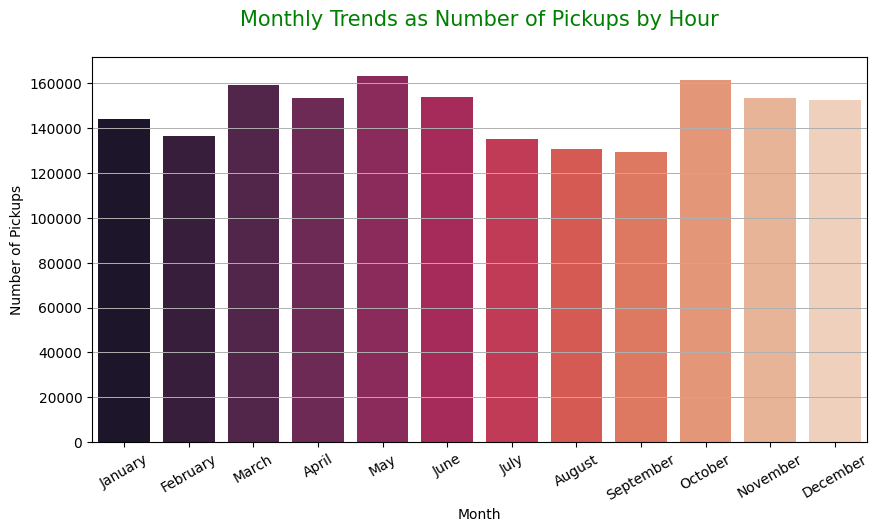

In [216]:
# Show the monthly trends in pickups
months = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='month', order = months, palette='rocket')
plt.title("Monthly Trends as Number of Pickups by Hour\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Month")
plt.xticks(rotation = 30)
plt.ylabel("Number of Pickups")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

#### <font color = green>Monthly Trends: Pickups decline after May to September, then sudden increase in October, likely due to lower summer tourism, business activity, and the start of the holiday season like thanksgiving.  </font> <br>


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [219]:
# Analyse the above parameters
for columns in ['fare_amount', 'tip_amount', 'totalAmount', 'trip_distance']:
    print (f" {columns} : Zero values: {(data[columns] == 0).sum()}, Negative values: {(data[columns] < 0).sum()}")

 fare_amount : Zero values: 243, Negative values: 0
 tip_amount : Zero values: 387913, Negative values: 0
 totalAmount : Zero values: 152, Negative values: 0
 trip_distance : Zero values: 18860, Negative values: 0


##### <font color = green> tip_amount can be zero. </font> <br>

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [222]:
# Create a df with non zero entries for the selected parameters.
data_clean = data[(data['fare_amount'] > 0) & (data['totalAmount'] > 0) & (data['trip_distance'] > 0)]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [224]:
# Group data by month and analyse monthly revenue
months = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = data_clean.groupby('month')['totalAmount'].sum().reindex(months)

In [226]:
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_revenue, palette='mako')
plt.title("Monthly Revenue\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Month")
plt.xticks(rotation = 30)
plt.ylabel("Amount in $")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green> July to September seems a decline in revenue. However october and may are the months with highest revenue.</font> <br>


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [229]:
# Calculate proportion of each quarter
# Create a new column quarter
data_clean['quarter'] = pd.PeriodIndex(data_clean.tpep_pickup_datetime, freq='Q')

In [231]:
data_clean.quarter.value_counts()

quarter
2023Q2    465432
2023Q4    462522
2023Q1    435214
2023Q3    390331
Freq: Q-DEC, Name: count, dtype: int64

In [233]:
sum_quarter_rev = data_clean.groupby("quarter").totalAmount.sum()

In [235]:
perc_quarter_rev = ((sum_quarter_rev / sum_quarter_rev.sum()) * 100).round(2)

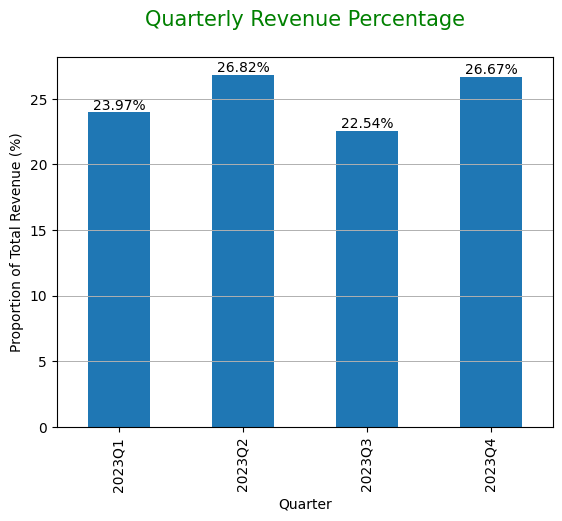

In [237]:
ax = perc_quarter_rev.plot(kind = 'bar')
#ax = sns.barplot(data = perc_quarter_rev)
annotate_bar(ax, back = '%' )
plt.title("Quarterly Revenue Percentage\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Quarter")
plt.ylabel("Proportion of Total Revenue (%)")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green> While Q3 saw a possible decline in revenue, Q2 and Q4 gave good performance with the highest revenue.</font> <br>


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [240]:
(data_clean.trip_distance > 0).value_counts() # trip distance is > 0 for all data points

trip_distance
True    1753499
Name: count, dtype: int64

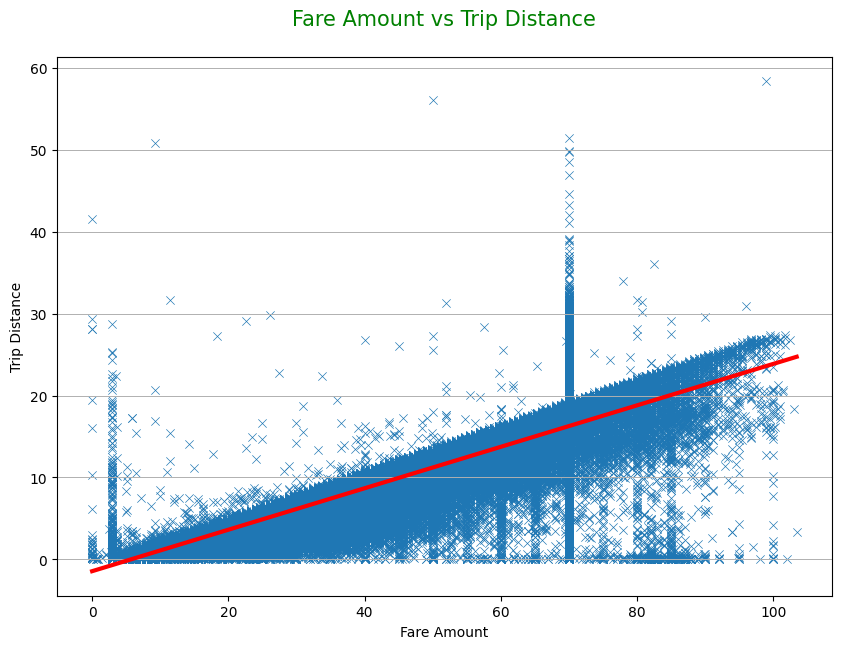

In [242]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_clean, y = 'trip_distance', x = 'fare_amount', marker = 'x')
sns.regplot(y='trip_distance', x='fare_amount', data=data_clean, scatter=False, color='red', line_kws={'linewidth': 3})
plt.title("Fare Amount vs Trip Distance\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Fare Amount")
#plt.xticks(rotation = 30)
plt.ylabel("Trip Distance")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green> The graph displays a linear trend with a positive correlation between the fare amount and trip distance. Outliers, however, are noticeable at fares of about 70 and 5–10 might be cause of route diversions and traffic conversions</font> <br>

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [246]:
# Show relationship between fare and trip duration
# create new column as trip duration
data_clean['trip_duration'] = (data_clean.tpep_dropoff_datetime - data_clean.tpep_pickup_datetime) / pd.Timedelta(minutes = 1)

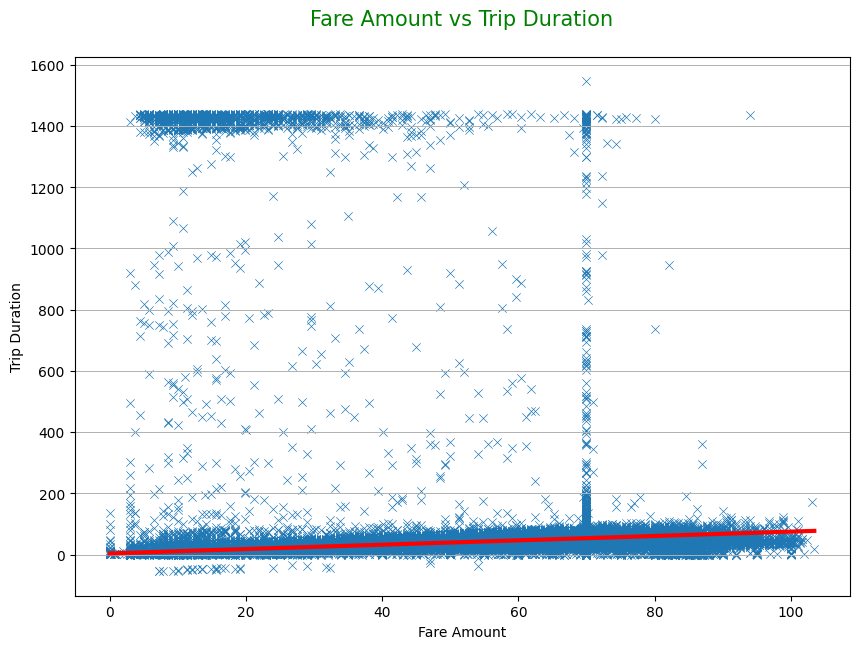

In [248]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_clean, y = 'trip_duration', x = 'fare_amount', marker = 'x')
sns.regplot(y='trip_duration', x='fare_amount', data=data_clean, scatter=False, color='red', line_kws={'linewidth': 3})
plt.title("Fare Amount vs Trip Duration\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Fare Amount")
#plt.xticks(rotation = 30)
plt.ylabel("Trip Duration")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

In [252]:
np.corrcoef(data_clean["trip_duration"], data_clean["fare_amount"])[0, 1]

0.27316140643554543

##### <font color = green> The variables have a positive correlation of about 27%, but the trend is skewed by a group of outliers around 1,400 minutes. Since the majority fall within this range, let's concentrate on data points that are less than 200 minutes. </font> <br>

In [255]:
len(data_clean[data_clean.trip_duration > 200])

1559

In [257]:
# capping the trip duration at 200 minutes
data_clean = data_clean[data_clean.trip_duration.between(0,200)]

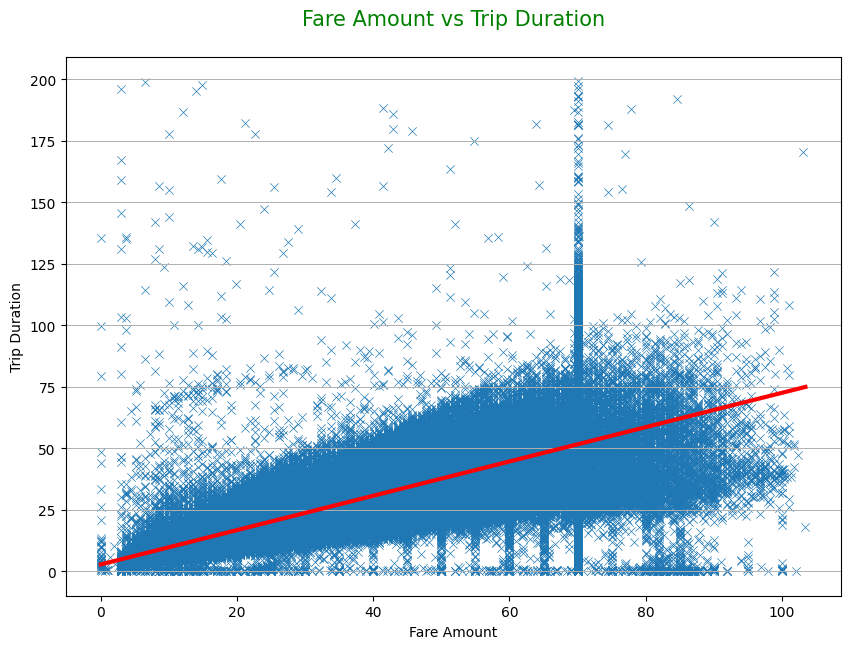

In [258]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_clean, y = 'trip_duration', x = 'fare_amount', marker = 'x')
sns.regplot(y='trip_duration', x='fare_amount', data=data_clean, scatter=False, color='red', line_kws={'linewidth': 3})
plt.title("Fare Amount vs Trip Duration\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Fare Amount")
plt.ylabel("Trip Duration")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green> The scatter plot shows a moderate positive correlation between trip duration and fare amount, with longer trips generally linked to higher fare amount </font> <br>

In [262]:
data_clean.passenger_count.value_counts()

passenger_count
1.000    1338188
2.000     270380
3.000      66832
4.000      37440
5.000      23736
6.000      15332
Name: count, dtype: int64

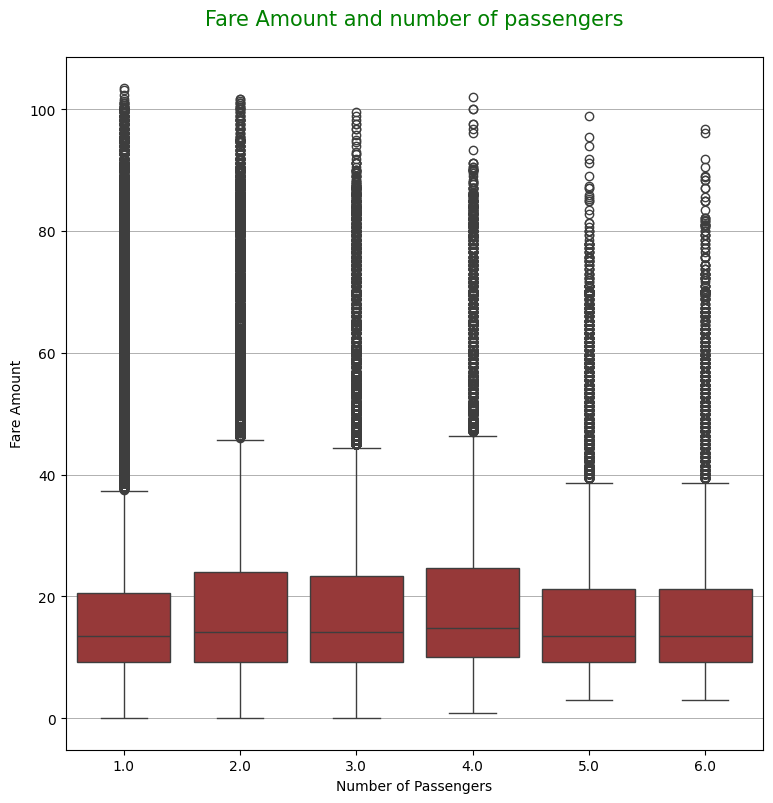

In [264]:
# Show relationship between fare and number of passengers
plt.figure(figsize=[9,9])
sns.boxplot(data = data_clean, x = 'passenger_count', y = 'fare_amount', color='brown')
plt.title("Fare Amount and number of passengers\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green> The median value tends to be a bit higher for groups of four passengers when you compare it to other group sizes. On the other hand, for solo travelers, the median stays pretty much the same as others indicating consistency in fare amount. </font> <br>

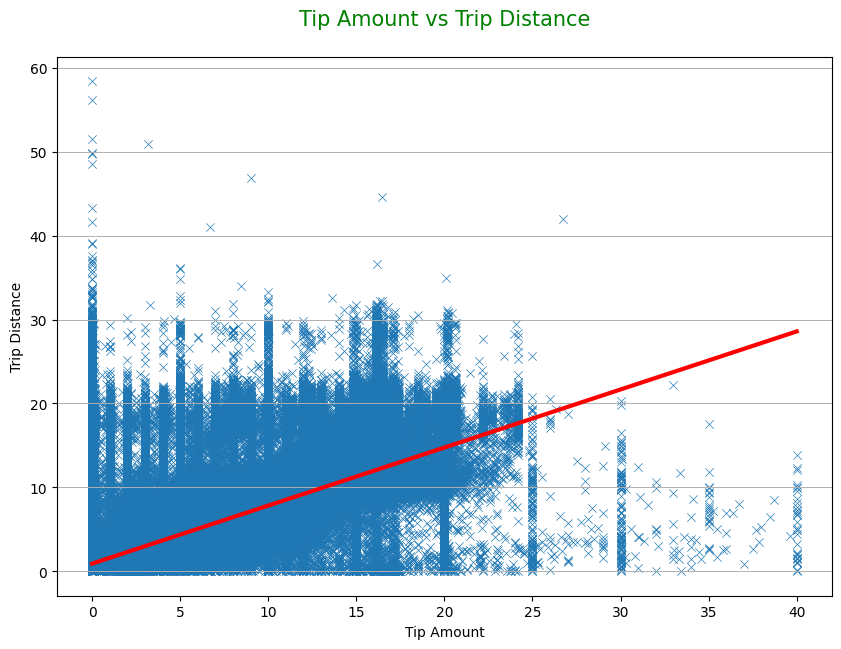

In [267]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data_clean, y = 'trip_distance', x = 'tip_amount', marker = 'x')
sns.regplot(y='trip_distance', x='tip_amount', data=data_clean, scatter=False, color='red', line_kws={'linewidth': 3})
plt.title("Tip Amount vs Trip Distance\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Tip Amount")
plt.ylabel("Trip Distance")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green> The plot along with a red trend/regression line, shows a gentle upward trend. This indicates that as the distance of the trip grows, the tip amount also increases. </font> <br>

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [270]:
# Analyse the distribution of different payment types (payment_type).
payment = data_clean.groupby("payment_type").size()
perc_payment = ((payment / payment.sum()) * 100).round(2)

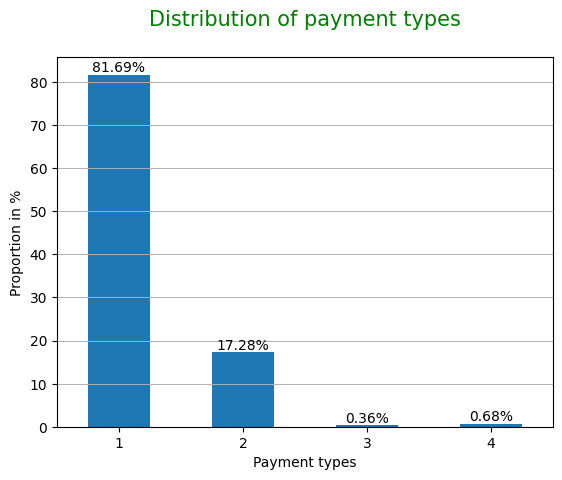

In [272]:
ax = perc_payment.plot(kind = 'bar')
annotate_bar(ax, back = '%' )
plt.title("Distribution of payment types\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Payment types")
plt.ylabel("Proportion in %")
plt.xticks(rotation = 0)
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green> Credit cards are definitely the go-to payment method for many people as they come with a bunch of perks and are super convenient. NYC Taxis can also consider introducing new smoother and beneficial payment modes  </font> <br>

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [281]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("../taxi/taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1       0.116       0.001           Newark Airport           1   
1         2       0.433       0.005              Jamaica Bay           2   
2         3       0.084       0.000  Allerton/Pelham Gardens           3   
3         4       0.044       0.000            Alphabet City           4   
4         5       0.092       0.000            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


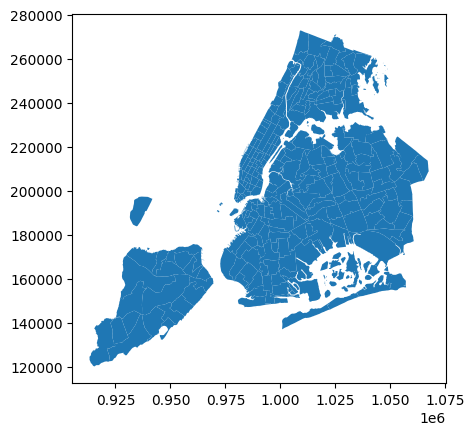

In [283]:
print(zones.info())
zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [285]:
data_clean.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airportFee', 'totalAmount', 'hour', 'weekday',
       'month', 'quarter', 'trip_duration'],
      dtype='object')

In [287]:
data_clean.shape

(1751908, 23)

In [289]:
# Merge zones and trip records using locationID and PULocationID
data_merged = data_clean.merge(zones, 
                left_on='PULocationID', 
                right_on='LocationID', 
                how='left')

data_merged.drop(columns=['LocationID'], inplace=True) # drop the extra column
data_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17            2.000   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12            4.000   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52            1.000   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20            2.000   
4         1  2023-01-01 00:55:02   2023-01-01 00:59:57            1.000   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0          2.850       1.000           263            41             1   
1          1.320       1.000            90           137             1   
2          3.170       1.000            79           141             1   
3          3.800       1.000           142           107             2   
4          0.600       1.000           237           237             1   

   fare_amount  ...  weekday    month  quarter  trip_duration  OBJECTID  \
0       15.600  ...   Sunday  January   2023Q1         12.450   263.000   
1       12.800  ...   Sunday  January   2023Q1         13.367    90.000   
2       14.900  ...   Sunday  January   2023Q1          9.250    79.000   
3       24.700  ...   Sunday  January   2023Q1         24.900   142.000   
4        6.500  ...   Sunday  January   2023Q1          4.917   237.000   

   Shape_Leng  Shape_Area                   zone    borough  \
0       0.037       0.000         Yorkville West  Manhattan   
1       0.031       0.000               Flatiron  Manhattan   
2       0.043       0.000           East Village  Manhattan   
3       0.038       0.000    Lincoln Square East  Manhattan   
4       0.042       0.000  Upper East Side South  Manhattan   

                                            geometry  
0  POLYGON ((997493.323 220912.386, 997355.264 22...  
1  POLYGON ((985265.129 208165.863, 985125.733 20...  
2  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  POLYGON ((989380.305 218980.247, 989359.803 21...  
4  POLYGON ((993633.442 216961.016, 993507.232 21...  

[5 rows x 29 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [292]:
# Group data by location and calculate the number of trips
trips_count = data_merged.groupby("PULocationID").size()
number_of_trips = pd.DataFrame({'LocationID' : trips_count.index, 'trip_count': trips_count.values })
number_of_trips.head()

LocationID  trip_count
0           1          22
1           2           2
2           3           2
3           4        1736
4           6          28

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [294]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(number_of_trips, 
                on='LocationID', 
                how='left')

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1       0.116       0.001           Newark Airport           1   
1         2       0.433       0.005              Jamaica Bay           2   
2         3       0.084       0.000  Allerton/Pelham Gardens           3   
3         4       0.044       0.000            Alphabet City           4   
4         5       0.092       0.000            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0      22.000  
1       2.000  
2       2.000  
3    1736.000  
4         NaN

In [296]:
# Impute NaN values with zero
zones["trip_count"].fillna(0, inplace=True)

In [298]:
zones.trip_count.isna().sum()

0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Figure size 1200x1200 with 0 Axes>

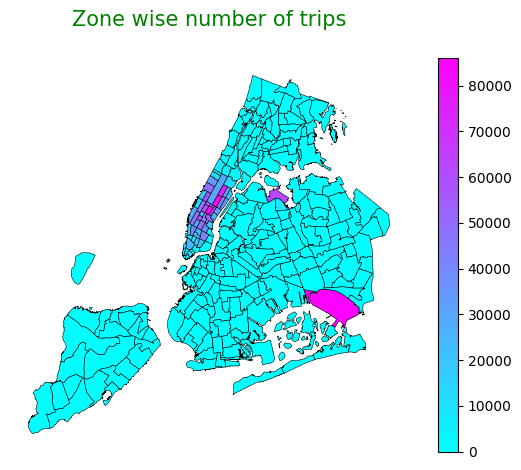

In [300]:
# Define figure and axis
plt.figure(figsize=(12, 12))

# Plot the map and display it
zones.plot(
    column='trip_count',        
    cmap='cool',                
    legend=True,                
    edgecolor='black',          
    linewidth=0.4              
)
plt.title("Zone wise number of trips\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.axis('off')                 # Hide axis lines
plt.tight_layout()
plt.show()

In [302]:
# can you try displaying the zones DF sorted by the number of trips?
zones_topTen = zones.sort_values(by='trip_count', ascending=False).head(10)
zones_topTen[['zone', 'borough', 'trip_count']]

zone    borough  trip_count
131                   JFK Airport     Queens   86158.000
236         Upper East Side South  Manhattan   84937.000
160                Midtown Center  Manhattan   83074.000
235         Upper East Side North  Manhattan   74648.000
161                  Midtown East  Manhattan   64319.000
185  Penn Station/Madison Sq West  Manhattan   62242.000
137             LaGuardia Airport     Queens   61594.000
229     Times Sq/Theatre District  Manhattan   59137.000
141           Lincoln Square East  Manhattan   58415.000
169                   Murray Hill  Manhattan   53033.000

In [304]:
data_clean.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airportFee', 'totalAmount', 'hour', 'weekday',
       'month', 'quarter', 'trip_duration'],
      dtype='object')

In [306]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'trip_count'],
      dtype='object')

In [308]:
data_merged.rename(columns={'zone': 'PUZone'}, inplace=True) #Change column name zone -> PUZone

In [310]:
# Create new column as DOZone (DropOff Zone)
data_merged = data_merged.merge(zones[['LocationID', 'zone']], 
                left_on='DOLocationID', 
                right_on='LocationID', 
                how='left')

In [312]:
data_merged.drop(columns=['LocationID'], inplace=True) # drop the extra column
data_merged.rename(columns={'zone': 'DOZone'}, inplace=True) #Change column name zone -> DOZone

In [314]:
data_merged.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17            2.000   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12            4.000   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52            1.000   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20            2.000   
4         1  2023-01-01 00:55:02   2023-01-01 00:59:57            1.000   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0          2.850       1.000           263            41             1   
1          1.320       1.000            90           137             1   
2          3.170       1.000            79           141             1   
3          3.800       1.000           142           107             2   
4          0.600       1.000           237           237             1   

   fare_amount  ...    month  quarter  trip_duration  OBJECTID  Shape_Leng  \
0       15.600  ...  January   2023Q1         12.450   263.000       0.037   
1       12.800  ...  January   2023Q1         13.367    90.000       0.031   
2       14.900  ...  January   2023Q1          9.250    79.000       0.043   
3       24.700  ...  January   2023Q1         24.900   142.000       0.038   
4        6.500  ...  January   2023Q1          4.917   237.000       0.042   

   Shape_Area                 PUZone    borough  \
0       0.000         Yorkville West  Manhattan   
1       0.000               Flatiron  Manhattan   
2       0.000           East Village  Manhattan   
3       0.000    Lincoln Square East  Manhattan   
4       0.000  Upper East Side South  Manhattan   

                                            geometry                 DOZone  
0  POLYGON ((997493.323 220912.386, 997355.264 22...         Central Harlem  
1  POLYGON ((985265.129 208165.863, 985125.733 20...               Kips Bay  
2  POLYGON ((988746.067 202151.955, 988733.885 20...        Lenox Hill West  
3  POLYGON ((989380.305 218980.247, 989359.803 21...               Gramercy  
4  POLYGON ((993633.442 216961.016, 993507.232 21...  Upper East Side South  

[5 rows x 30 columns]

In [316]:
# check for null values in PUZone and DOZone
data_merged[data_merged.PUZone.isnull()].PULocationID.value_counts()

PULocationID
264    15550
265      209
57         5
105        1
Name: count, dtype: int64

In [318]:
data_merged[data_merged.DOZone.isnull()].DOLocationID.value_counts()

DOLocationID
264    15899
265     3290
57        27
Name: count, dtype: int64

In [320]:
zones[zones.LocationID.isin([264,265,57,105])]

Empty GeoDataFrame
Columns: [OBJECTID, Shape_Leng, Shape_Area, zone, LocationID, borough, geometry, trip_count]
Index: []

In [322]:
# No such zones exist with LocationID - 264,265,57,105. hence removing such invalid instances.

In [324]:
data_merged.dropna(subset=["PUZone"], inplace=True)

In [326]:
data_merged.dropna(subset=["DOZone"], inplace=True)

In [328]:
data_merged.shape

(1729887, 30)

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [330]:
# Find routes which have the slowest speeds at different times of the day
data_new = data_merged.copy()


In [332]:
data_new['speed_mph'] = (data_new.trip_distance / data_new.trip_duration) * 60 # convert miles per minute to mph 

In [334]:
# creating routes
data_new['routes'] = data_new['PUZone'].astype(str) + '_' + data_new['DOZone'].astype(str)

In [336]:
routes_data = data_new.groupby(['routes', 'hour'])['speed_mph'].mean().reset_index()

In [338]:
slow_routes = routes_data.sort_values(['hour', 'speed_mph']).groupby('hour').first().reset_index()

In [340]:
slow_routes # slow routes at each hour of the day

hour                                             routes  speed_mph
0      0                Clinton East_Mott Haven/Port Morris      0.152
1      1                            Boerum Hill_Boerum Hill      0.279
2      2                        Melrose South_Melrose South      0.529
3      3                                   Corona_Rego Park      0.655
4      4                          Clinton West_Clinton West      0.604
5      5                          Jackson Heights_Chinatown      1.800
6      6                              East Chelsea_Flatiron      1.600
7      7                        Carroll Gardens_Cobble Hill      0.833
8      8                             Park Slope_JFK Airport      1.064
9      9  Upper East Side North_Long Island City/Queens ...      0.262
10    10             Midtown Center_Queensbridge/Ravenswood      0.133
11    11                    Queensbridge/Ravenswood_Astoria      0.279
12    12                     Upper East Side North_Woodside      0.442
13    13    Queensbridge/Ravenswood_Queensbridge/Ravenswood      0.016
14    14            Washington Heights North_Yorkville West      2.350
15    15         Two Bridges/Seward Park_Stuyvesant Heights      0.534
16    16                        South Jamaica_South Jamaica      0.021
17    17                     East Williamsburg_East Chelsea      0.037
18    18    Briarwood/Jamaica Hills_Briarwood/Jamaica Hills      0.123
19    19  Penn Station/Madison Sq West_East Flatbush/Far...      1.307
20    20                            West Village_Ocean Hill      0.417
21    21                                Glen Oaks_Glen Oaks      0.527
22    22              Battery Park_Financial District South      2.293
23    23     DUMBO/Vinegar Hill_Downtown Brooklyn/MetroTech      1.955

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [342]:
# Visualise the number of trips per hour and find the busiest hour
data_new['hour'].value_counts().nlargest(1)


hour
18    122848
Name: count, dtype: int64

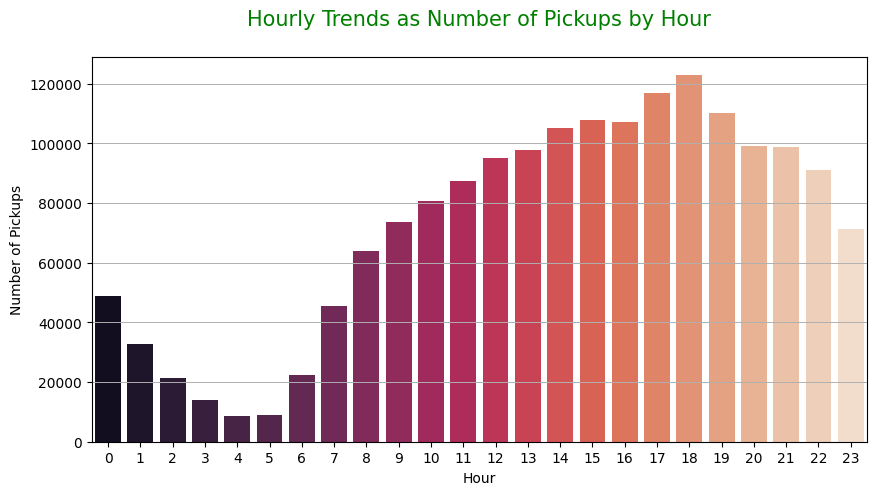

In [344]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data_new, x='hour', palette='rocket')
plt.title("Hourly Trends as Number of Pickups by Hour\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Hour")
plt.ylabel("Number of Pickups")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green>The busiest hour with most number of pickups is at 18:00(06:00PM) with 122848 pickups in that hour. we can see a noticeable decline after midnight, reaching its lowest point around 4 and 5 a.m.  </font> <br>

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [347]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

trip_hour_sample = data_new['hour'].value_counts()
trip_hour_actual = (trip_hour_sample / sample_fraction).round().astype(int)
trip_hour_actual.sort_values(ascending = False).head()


hour
18    2456960
17    2336920
19    2205960
15    2154160
16    2140360
Name: count, dtype: int32

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [349]:
data_new.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airportFee', 'totalAmount', 'hour', 'weekday',
       'month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'PUZone', 'borough', 'geometry', 'DOZone', 'speed_mph',
       'routes'],
      dtype='object')

In [351]:
# Compare traffic trends for the week days and weekends
#new column for dayType
data_new['dayType'] = data_new.weekday.apply(lambda day: 'weekend' if day in ['Saturday', 'Sunday'] else 'weekday')

In [353]:
trip_dayType_hour = data_new.groupby(['hour', 'dayType']).size().reset_index(name='trips')

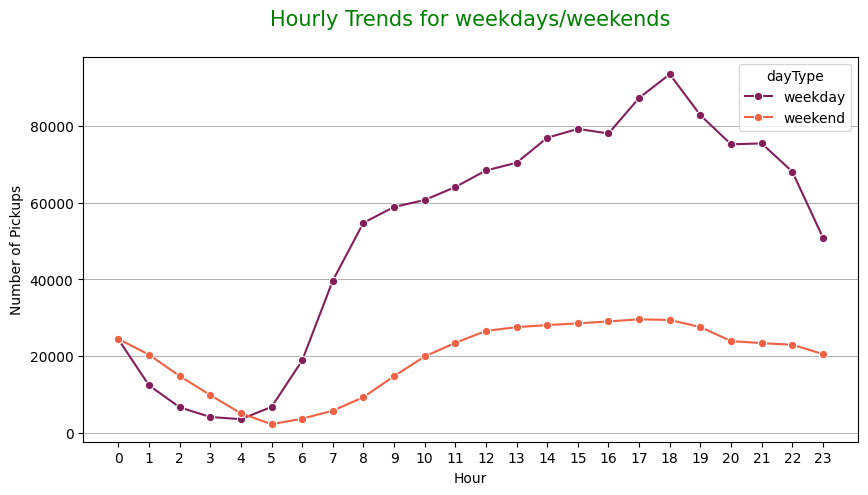

In [355]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=trip_dayType_hour, x='hour', y = 'trips', palette='rocket', hue = 'dayType', marker='o')
plt.title("Hourly Trends for weekdays/weekends\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Hour")
plt.xticks(range(0, 24))
plt.ylabel("Number of Pickups")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

##### <font color = green> Weekday traffic starts as early as from 5 AM and has a sharp increase till 9AM. and then it slowly rises to peak number of pickups at 6.00 pm and then it steeply declines majorly after 9pm. while in weekends the traffic starts from 7AM a bit late and it increases and is at peak from 12.00pm to 06.00 pm. thre's a noticeable higher number of pickups from 12am to 3 am might be cause of parties and social outings. </font> <br>

##### <font color = green> NYC taxis can deploy more taxi during the busy weekday rush hours, especially in both residential neighborhoods and business zones. While, on weekends, they can provide more number of services from midday to early evening, including late-night rides are in entertainment or nightlife zones. </font> <br>

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [359]:
# Find top 10 pickup and dropoff zones
PUZone_top10 = data_new.PUZone.value_counts().nlargest(10).reset_index(name = 'trip_count')
DOZone_top10 = data_new.DOZone.value_counts().nlargest(10).reset_index(name = 'trip_count')

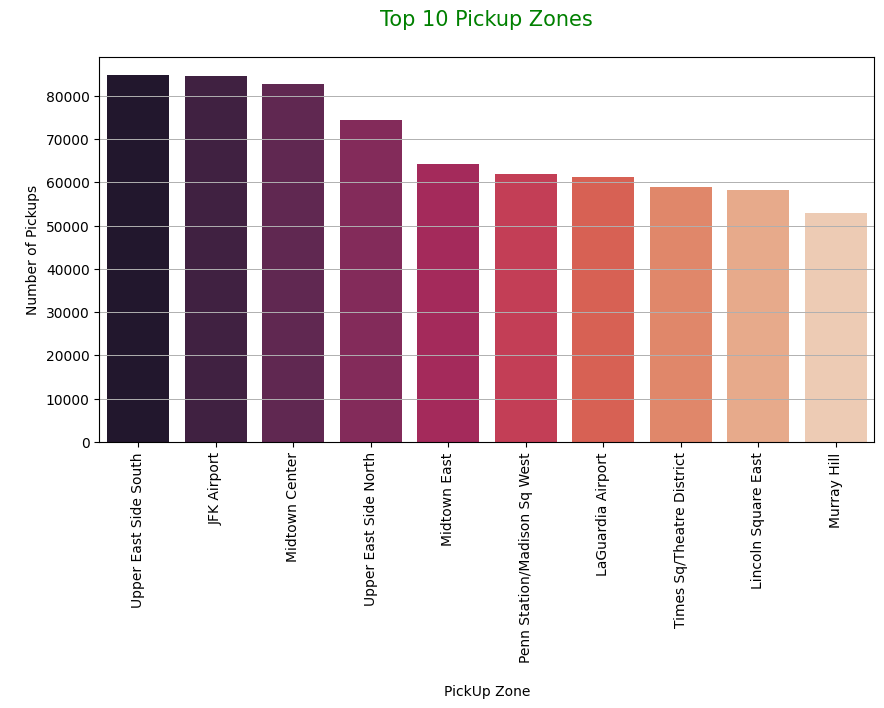

In [361]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=PUZone_top10, x = 'PUZone', y = 'trip_count', palette='rocket')
plt.title("Top 10 Pickup Zones\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nPickUp Zone")
plt.xticks(rotation = 90)
plt.ylabel("\nNumber of Pickups")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

In [363]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=DOZone_top10, x = 'DOZone', y = 'trip_count', palette='rocket')
plt.title("Top 10 DropOff Zones\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nDropOff Zone")
plt.xticks(rotation = 90)
plt.ylabel("\nNumber of Drops")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [365]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
PUCount = data_new.PUZone.value_counts().reset_index(name = 'PU_count')
DOCount = data_new.DOZone.value_counts().reset_index(name = 'DO_count')

In [367]:
ratio_zones = pd.concat([PUCount, DOCount], axis=1).fillna(1)

In [369]:
ratio_zones['PU_DO_Ratio'] = ratio_zones['PU_count'] / ratio_zones['DO_count'].replace(0, 1)

In [371]:
ratio_zones_top10 = ratio_zones.nlargest(10, 'PU_DO_Ratio')
ratio_zones_bottom10 = ratio_zones.nsmallest(10, 'PU_DO_Ratio')

In [373]:
ratio_zones_top10

PUZone  PU_count                        DOZone  \
3          Upper East Side North 74479.000     Times Sq/Theatre District   
8            Lincoln Square East 58293.000               Lenox Hill West   
5   Penn Station/Madison Sq West 62029.000                  Midtown East   
6              LaGuardia Airport 61230.000           Lincoln Square East   
4                   Midtown East 64159.000                   Murray Hill   
23         Upper West Side North 33541.000           UN/Turtle Bay South   
2                 Midtown Center 82833.000                Midtown Center   
14                  East Chelsea 46584.000  Penn Station/Madison Sq West   
13                  Clinton East 46836.000         Upper West Side North   
9                    Murray Hill 52895.000                  East Chelsea   

    DO_count  PU_DO_Ratio  
3      53867        1.383  
8      46990        1.241  
5      50455        1.229  
6      50055        1.223  
4      52474        1.223  
23     27718        1.210  
2      69075        1.199  
14     39045        1.193  
13     39273        1.193  
9      44847        1.179

In [375]:
ratio_zones_bottom10

PUZone  PU_count                           DOZone  \
216                   Hollis     2.000                  Highbridge Park   
217  Allerton/Pelham Gardens     2.000          Allerton/Pelham Gardens   
218      Grymes Hill/Clifton     2.000                        Gravesend   
228             Crotona Park     1.000                     Country Club   
219                Bronxdale     2.000                Crotona Park East   
220  Bay Terrace/Fort Totten     2.000  Marine Park/Floyd Bennett Field   
221  Bloomfield/Emerson Hill     2.000                 Inwood Hill Park   
206                  Midwood     3.000                         Longwood   
207                Gravesend     3.000               Soundview/Bruckner   
222       Murray Hill-Queens     2.000                    Fordham South   

     DO_count  PU_DO_Ratio  
216        89        0.022  
217        86        0.023  
218        82        0.024  
228        41        0.024  
219        81        0.025  
220        78        0.026  
221        76        0.026  
206       110        0.027  
207       107        0.028  
222        71        0.028

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [377]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
data_night = data_new[(data_new.hour >= 23) | (data_new.hour <= 5) ]

In [379]:
data_night.shape

(205312, 33)

In [381]:
PUZone_top10_night = data_night.PUZone.value_counts().nlargest(10).reset_index(name = 'trip_count')
DOZone_top10_night = data_night.DOZone.value_counts().nlargest(10).reset_index(name = 'trip_count')

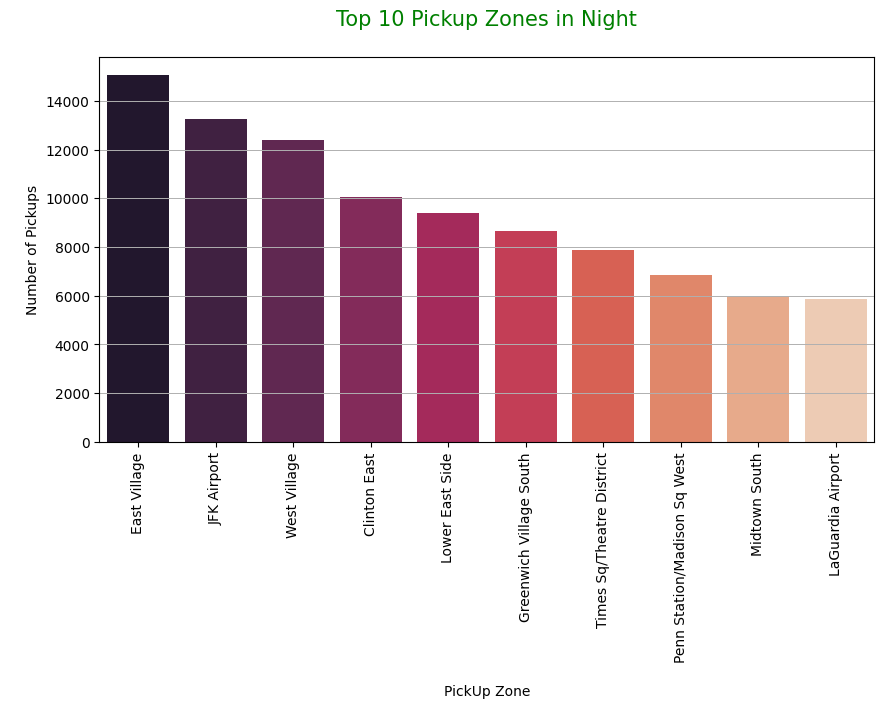

In [383]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=PUZone_top10_night, x = 'PUZone', y = 'trip_count', palette='rocket')
plt.title("Top 10 Pickup Zones in Night\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nPickUp Zone")
plt.xticks(rotation = 90)
plt.ylabel("\nNumber of Pickups")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

In [385]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=DOZone_top10_night, x = 'DOZone', y = 'trip_count', palette='rocket')
plt.title("Top 10 DropOff Zones in Night\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nDropOff Zone")
plt.xticks(rotation = 90)
plt.ylabel("\nNumber of Drops")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [387]:
# Filter for night hours (11 PM to 5 AM)
data_day = data_new[~((data_new.hour >= 23) | (data_new.hour <= 5)) ]

In [389]:
revenue_in_night = data_night.totalAmount.sum()
revenue_in_day = data_day.totalAmount.sum()
revenue_total = data_new.totalAmount.sum()

In [391]:
Revenue_day_night = pd.DataFrame({'Revenue': [revenue_in_day, revenue_in_night], 
              'Revenue Share (%)': [(revenue_in_day/revenue_total)*100,(revenue_in_night/revenue_total)*100 ]},
              index = ['Day', 'Night']
            )

In [393]:
Revenue_day_night

Revenue  Revenue Share (%)
Day   43116748.440             87.942
Night  5912143.180             12.058

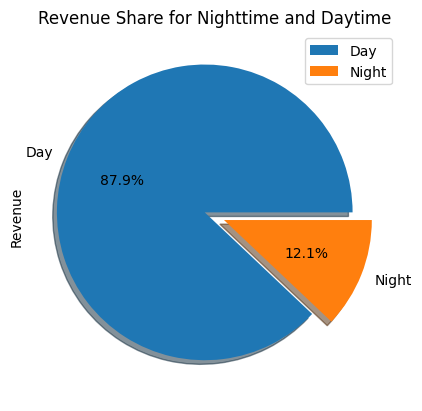

In [395]:
ax = Revenue_day_night.Revenue.plot(kind="pie", autopct='%1.1f%%', shadow = True, explode=[0.07, 0.07], legend=True, title='Revenue Share for Nighttime and Daytime')
ax.legend( loc='upper right')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [397]:
# Analyse the fare per mile per passenger for different passenger counts
data_pricing = data_new.copy()

In [399]:
data_pricing['fare_mpp'] = data_pricing['fare_amount'] / (data_pricing['trip_distance'] * data_pricing['passenger_count'])

In [401]:
avg_fare_mpp = data_pricing.groupby('passenger_count')['fare_mpp'].mean().round(2)

In [403]:
avg_fare_mpp

passenger_count
1.000   10.400
2.000    6.150
3.000    3.430
4.000    3.380
5.000    1.730
6.000    1.390
Name: fare_mpp, dtype: float64

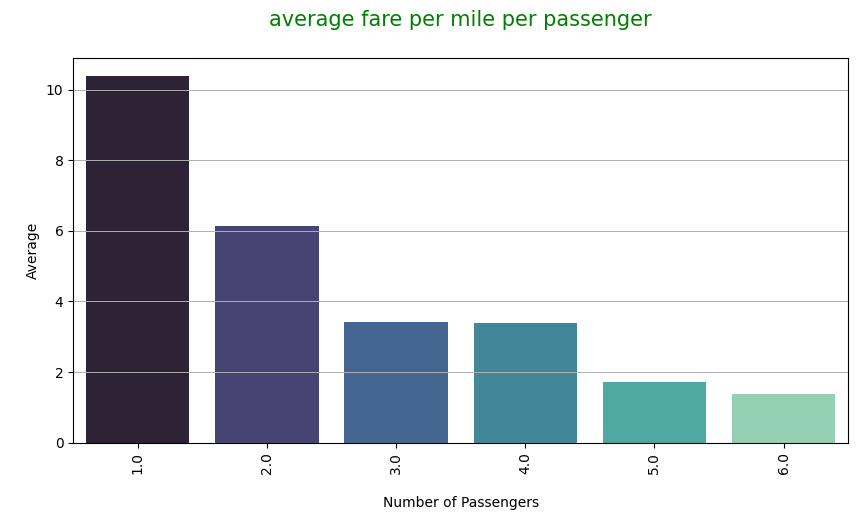

In [405]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=avg_fare_mpp,palette='mako')
plt.title("average fare per mile per passenger\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nNumber of Passengers")
plt.xticks(rotation = 90)
plt.ylabel("\nAverage")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [407]:
# Compare the average fare per mile for different days and for different times of the day
data_pricing['fare_per_mile'] = data_pricing['fare_amount'] / data_pricing['trip_distance']

In [409]:
fare_mhr = data_pricing.groupby('hour').fare_per_mile.mean()

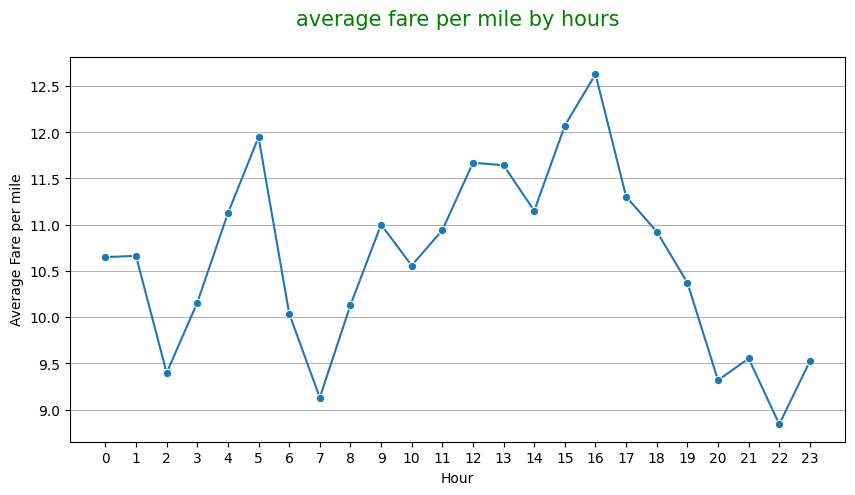

In [411]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_mhr, palette='mako',  marker='o')
plt.title("average fare per mile by hours\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Hour")
plt.xticks(range(0, 24))
plt.ylabel("Average Fare per mile")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

In [413]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_mday = data_pricing.groupby('weekday').fare_per_mile.mean().reindex(weekdays)

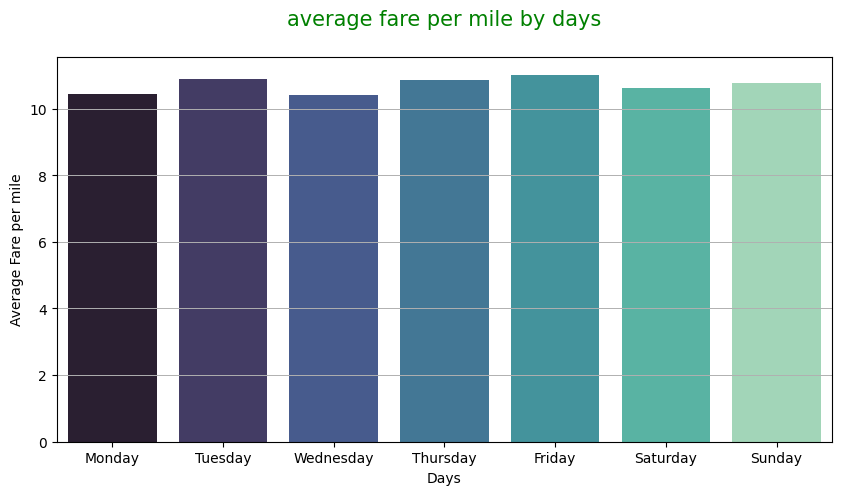

In [415]:
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_mday, palette='mako')
plt.title("average fare per mile by days\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Days")
plt.ylabel("Average Fare per mile")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [417]:
data_pricing.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airportFee', 'totalAmount', 'hour', 'weekday',
       'month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'PUZone', 'borough', 'geometry', 'DOZone', 'speed_mph',
       'routes', 'dayType', 'fare_mpp', 'fare_per_mile'],
      dtype='object')

In [419]:
# Compare fare per mile for different vendors
fare_mVendor = data_pricing.groupby(['VendorID', 'hour']).fare_per_mile.mean().reset_index()

In [421]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_mVendor, x='hour', y='fare_per_mile', palette='viridis', hue = 'VendorID',  marker='o')
plt.title("average fare per mile by hours\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("Hour")
plt.xticks(range(0, 24))
plt.ylabel("Average Fare per mile")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [423]:
# Defining distance tiers
data_pricing['tiered_distance'] = np.where(data_pricing.trip_distance <=2, 'Upto 2 Miles', np.where(data_pricing.trip_distance <=5, '2 to 5 Miles', 'More than 5 Miles'))
data_pricing.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17            2.000   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12            4.000   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52            1.000   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20            2.000   
4         1  2023-01-01 00:55:02   2023-01-01 00:59:57            1.000   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0          2.850       1.000           263            41             1   
1          1.320       1.000            90           137             1   
2          3.170       1.000            79           141             1   
3          3.800       1.000           142           107             2   
4          0.600       1.000           237           237             1   

   fare_amount  ...                 PUZone    borough  \
0       15.600  ...         Yorkville West  Manhattan   
1       12.800  ...               Flatiron  Manhattan   
2       14.900  ...           East Village  Manhattan   
3       24.700  ...    Lincoln Square East  Manhattan   
4        6.500  ...  Upper East Side South  Manhattan   

                                            geometry                 DOZone  \
0  POLYGON ((997493.323 220912.386, 997355.264 22...         Central Harlem   
1  POLYGON ((985265.129 208165.863, 985125.733 20...               Kips Bay   
2  POLYGON ((988746.067 202151.955, 988733.885 20...        Lenox Hill West   
3  POLYGON ((989380.305 218980.247, 989359.803 21...               Gramercy   
4  POLYGON ((993633.442 216961.016, 993507.232 21...  Upper East Side South   

   speed_mph                                       routes  dayType  fare_mpp  \
0     13.735                Yorkville West_Central Harlem  weekend     2.737   
1      5.925                            Flatiron_Kips Bay  weekend     2.424   
2     20.562                 East Village_Lenox Hill West  weekend     4.700   
3      9.157                 Lincoln Square East_Gramercy  weekend     3.250   
4      7.322  Upper East Side South_Upper East Side South  weekend    10.833   

   fare_per_mile tiered_distance  
0          5.474    2 to 5 Miles  
1          9.697    Upto 2 Miles  
2          4.700    2 to 5 Miles  
3          6.500    2 to 5 Miles  
4         10.833    Upto 2 Miles  

[5 rows x 36 columns]

In [425]:
tiered_distance = data_pricing.groupby(['VendorID','tiered_distance']).fare_per_mile.mean().reset_index()

In [427]:
tiered_distance

VendorID    tiered_distance  fare_per_mile
0         1       2 to 5 Miles          6.360
1         1  More than 5 Miles          4.451
2         1       Upto 2 Miles          9.679
3         2       2 to 5 Miles          6.547
4         2  More than 5 Miles          4.476
5         2       Upto 2 Miles         16.264

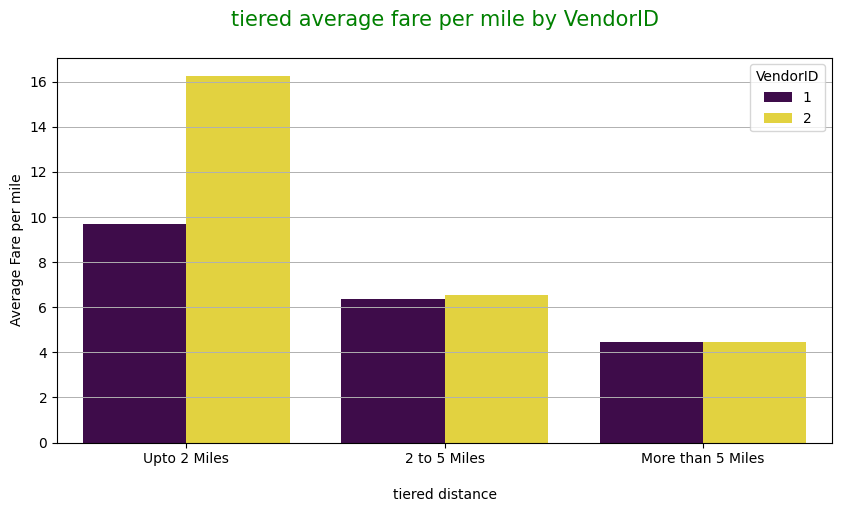

In [429]:
plt.figure(figsize=(10, 5))
sns.barplot(data=tiered_distance, x='tiered_distance', y='fare_per_mile', palette='viridis', hue = 'VendorID', order= ['Upto 2 Miles', '2 to 5 Miles', 'More than 5 Miles'])
plt.title("tiered average fare per mile by VendorID\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\ntiered distance")
plt.ylabel("Average Fare per mile")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

In [431]:
data_pricing.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'airportFee', 'totalAmount', 'hour', 'weekday',
       'month', 'quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'PUZone', 'borough', 'geometry', 'DOZone', 'speed_mph',
       'routes', 'dayType', 'fare_mpp', 'fare_per_mile', 'tiered_distance'],
      dtype='object')

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [433]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
data_pricing['perc_tip'] = (data_pricing.tip_amount / data_pricing.totalAmount)*100

In [435]:
perc_tip_distance = data_pricing.groupby(['tiered_distance']).perc_tip.mean().reset_index()
perc_tip_passenger = data_pricing.groupby(['passenger_count']).perc_tip.mean().reset_index()
perc_tip_hour = data_pricing.groupby(['hour']).perc_tip.mean().reset_index()

In [437]:
perc_tip_hour

hour  perc_tip
0      0    11.793
1      1    11.697
2      2    11.491
3      3    10.880
4      4    10.248
5      5    10.184
6      6    11.032
7      7    11.807
8      8    12.067
9      9    11.867
10    10    11.662
11    11    11.601
12    12    11.575
13    13    11.527
14    14    11.556
15    15    11.567
16    16    11.532
17    17    11.807
18    18    11.995
19    19    11.991
20    20    12.241
21    21    12.394
22    22    12.269
23    23    12.018

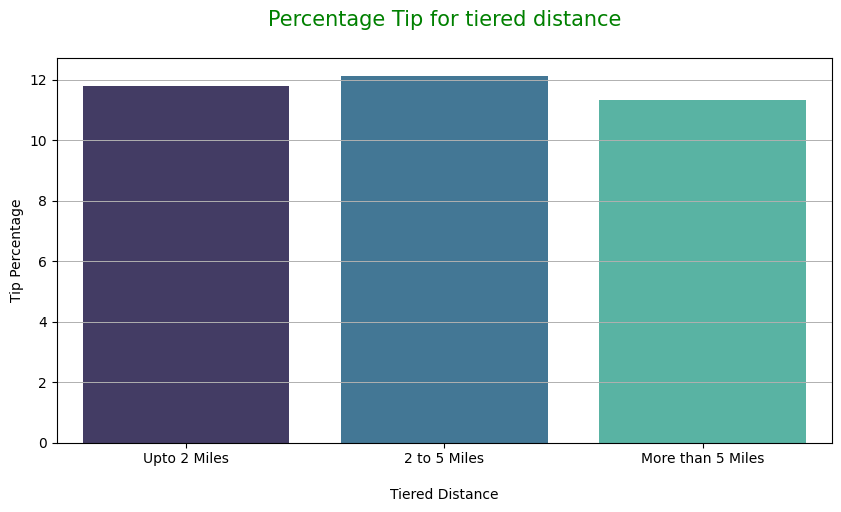

In [439]:
plt.figure(figsize=(10, 5))
sns.barplot(data=perc_tip_distance, x = 'tiered_distance', y= 'perc_tip', palette='mako', order= ['Upto 2 Miles', '2 to 5 Miles', 'More than 5 Miles'])
plt.title("Percentage Tip for tiered distance\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nTiered Distance")
plt.ylabel("Tip Percentage")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

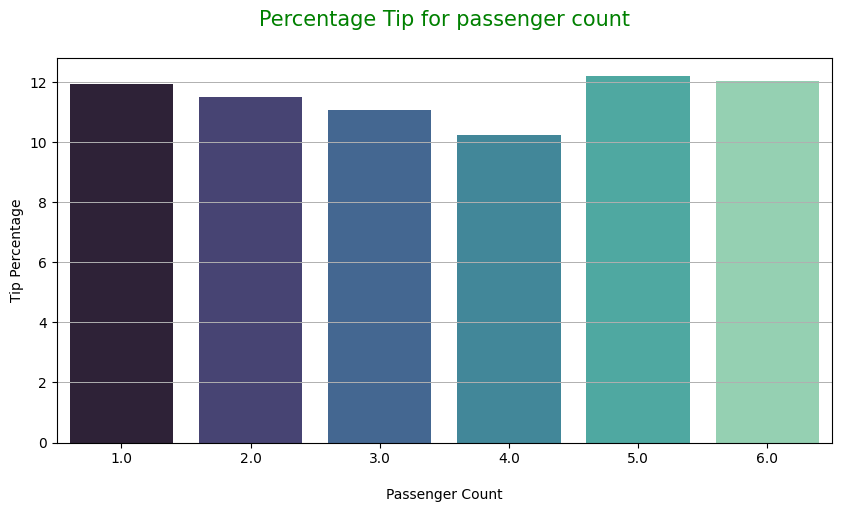

In [441]:
plt.figure(figsize=(10, 5))
sns.barplot(data=perc_tip_passenger, x = 'passenger_count', y= 'perc_tip', palette='mako')
plt.title("Percentage Tip for passenger count\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nPassenger Count")
plt.ylabel("Tip Percentage")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

In [443]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=perc_tip_hour, x='hour', y='perc_tip', palette='viridis',  marker='o')
plt.title("Percentage tip for hours\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nHour")
plt.xticks(range(0, 24))
plt.ylabel("Tip Percentage")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

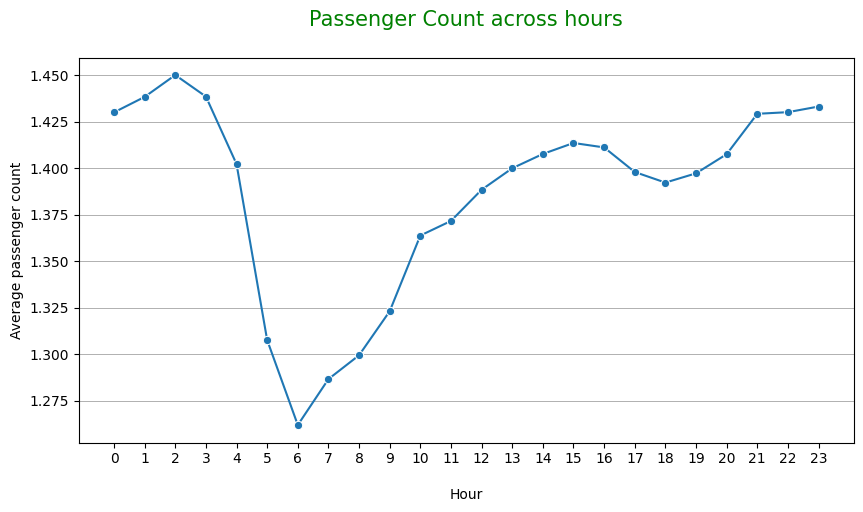

In [445]:
# See how passenger count varies across hours and days
passenger_hr = data_pricing.groupby('hour').passenger_count.mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=passenger_hr, x='hour', y='passenger_count', palette='viridis',  marker='o')
plt.title("Passenger Count across hours\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nHour")
plt.xticks(range(0, 24))
plt.ylabel("Average passenger count")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

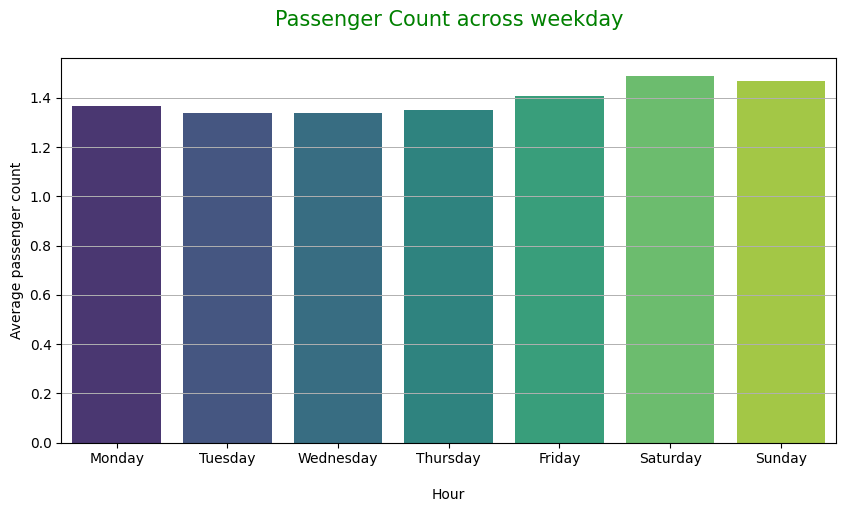

In [447]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_weekday = data_pricing.groupby('weekday').passenger_count.mean().reindex(weekdays)
plt.figure(figsize=(10, 5))
sns.barplot(data=passenger_weekday, palette='viridis')
plt.title("Passenger Count across weekday\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nHour")
plt.ylabel("Average passenger count")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

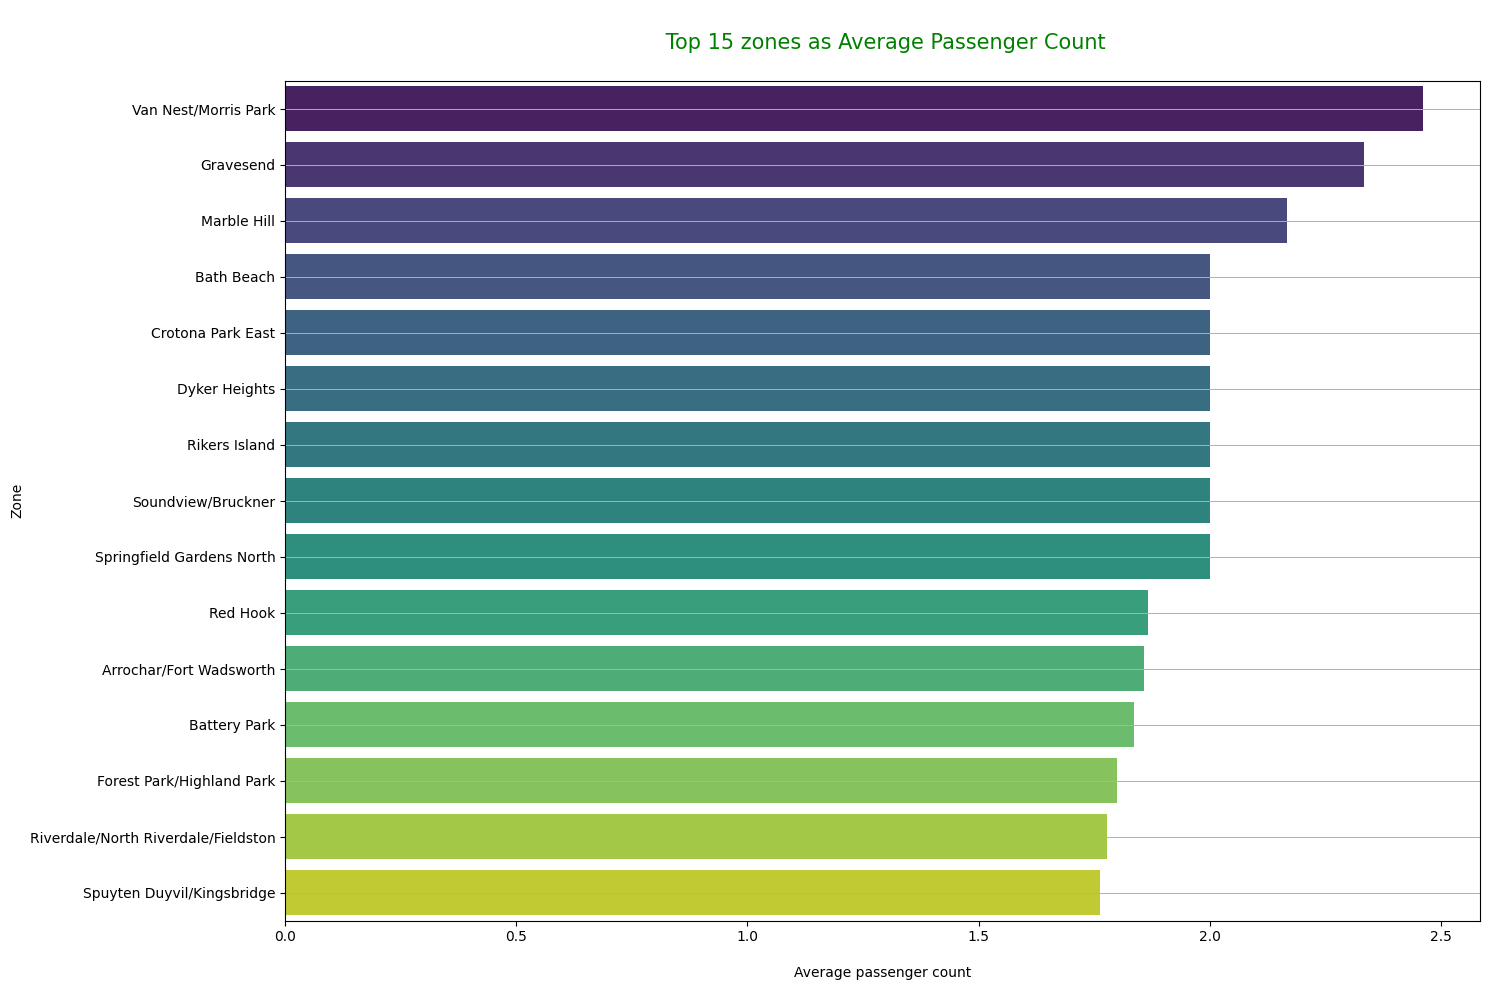

In [449]:
# How does passenger count vary across zones
passenger_zone = data_pricing.groupby('PUZone').passenger_count.mean()
plt.figure(figsize=(15, 10))
sns.barplot(data=passenger_zone.nlargest(15), palette='viridis', orient = 'h')
plt.title("\n Top 15 zones as Average Passenger Count\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nAverage passenger count")
plt.ylabel("Zone")
plt.tight_layout()
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

In [451]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
passenger_zones = data_pricing.groupby('PULocationID').passenger_count.mean().reset_index()
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1       0.116       0.001           Newark Airport           1   
1           2       0.433       0.005              Jamaica Bay           2   
2           3       0.084       0.000  Allerton/Pelham Gardens           3   
3           4       0.044       0.000            Alphabet City           4   
4           5       0.092       0.000            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259       0.127       0.000       Woodlawn/Wakefield         259   
259       260       0.134       0.000                 Woodside         260   
260       261       0.027       0.000       World Trade Center         261   
261       262       0.049       0.000           Yorkville East         262   
262       263       0.037       0.000           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     trip_count  
0        22.000  
1         2.000  
2         2.000  
3      1736.000  
4         0.000  
..          ...  
258       7.000  
259     253.000  
260    9092.000  
261   23156.000  
262   33627.000  

[263 rows x 8 columns]

In [453]:
avg_passenger_zone = zones.merge(passenger_zones, left_on='LocationID', right_on='PULocationID', how = 'left' )

In [455]:
avg_passenger_zone.passenger_count.fillna(0, inplace=True)

<Figure size 1200x1200 with 0 Axes>

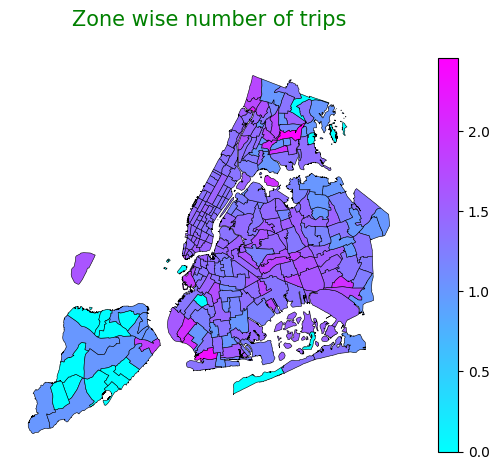

In [457]:
# Define figure and axis
plt.figure(figsize=(12, 12))

# Plot the map and display it
avg_passenger_zone.plot(
    column='passenger_count',        
    cmap='cool',                
    legend=True,                
    edgecolor='black',          
    linewidth=0.4              
)
plt.title("Zone wise number of trips\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.axis('off')               
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [459]:
# How often is each surcharge applied?
extra_charges_col = ["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "airportFee"]
extra_charges_count = (data_pricing[extra_charges_col] > 0).sum()
perc_extra_charges = (extra_charges_count / len(data_pricing)) * 100
perc_extra_charges

extra                   61.872
mta_tax                 99.801
improvement_surcharge   99.999
congestion_surcharge    94.222
airportFee               8.400
dtype: float64

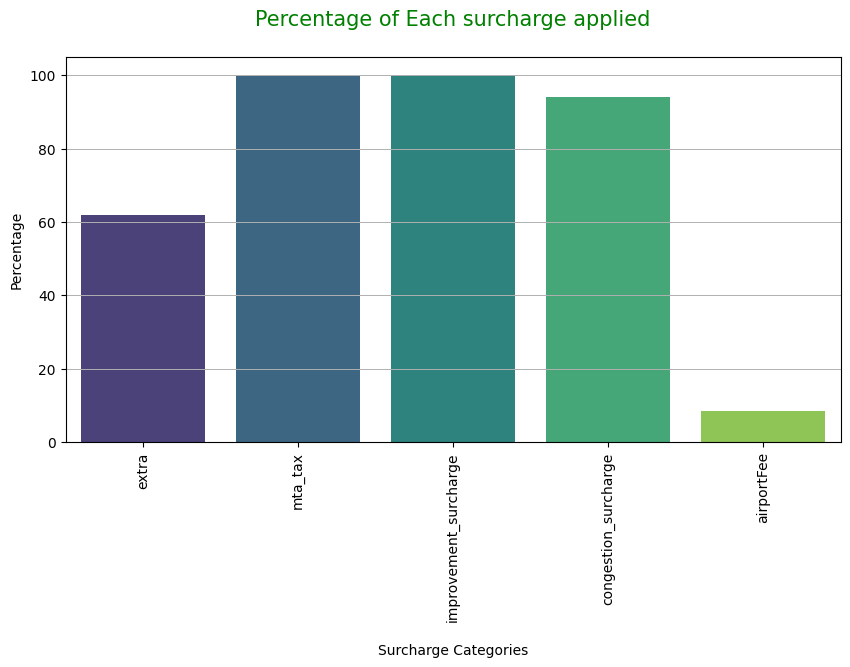

In [461]:
plt.figure(figsize=(10, 5))
sns.barplot(data=perc_extra_charges, palette='viridis')
plt.title("Percentage of Each surcharge applied\n", fontdict = {'size' : 15, 'weight' : 5, 'color': 'green' })
plt.xlabel("\nSurcharge Categories")
plt.xticks(rotation = 90)
plt.ylabel("Percentage")
plt.grid(axis='y', linewidth = 0.7  )
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

-	**Utilize Peak Hour data for Ideal Taxi Distribution:** 
The peak times, especially from 3 p.m. to 7 p.m., must be prioritized for effective taxi allocation. Taxis can be strategically placed in commercial zones and neighborhoods, where the demand increases as individuals complete their workday or travel back home.
Increased demand in these periods causes congestion, and an efficient fleet deployment will ease the pressure on both passengers and drivers, resulting in more seamless operations


-	**Optimize Taxis Around Airport Hubs (e.g., JFK):**
JFK airport is recognized as the most congested area, making it essential to assign more taxis to the airport for incoming and outgoing flights, particularly during high travel periods. Merging taxi schedules with flight times can guarantee that taxis are accessible when travelers require them the most.

-	**Tackle Traffic Congestion and Optimize Routes:**
Due to the significant congestion surcharge and reduced speeds at peak times, route optimization tools can be implemented that consider live traffic conditions. The deployment of machine learning algorithms might forecast traffic trends, circumventing congestion areas and offering the most optimal paths.

By applying these tactics focused on time of day, location, and operational inefficiencies, NYC taxis can more effectively satisfy customer demand while enhancing supply and minimizing operational costs. This method will also improve the customer experience, offering quicker, more dependable service during both the hectic weekdays and the more relaxed weekends


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

-	**Place taxis in high-demand commercial and residential areas during peak times:**
Position taxis in areas of high demand, such as business districts (e.g., Midtown Manhattan) and residential neighborhoods, during weekday peak hours (morning rush from 5 a.m. to 9 a.m. and evening rush from 4 p.m. to 7 p.m.), when people are traveling to and from work. Furthermore, maintain taxis positioned close to subway stations and transport hubs where travelers usually switch from public transport to cabs.

-	**Concentrate on Well-Known Tourist and Business Destinations for Airport and Weekend Getaways:**
maintain taxis stationed close to airports (notably JFK) for passengers arriving or leaving during peak times, especially in the early morning and late evening hours.
Tourists and business visitors frequently gather in well-known locations. Making sure taxis are available in these locations can enhance accessibility and minimize passenger wait durations.

-	**Designate Late-Night Zones for Entertainment and Nightlife Districts:**
In light of the increased demand from midnight to 3 a.m. (probably stemming from late-night social events), place taxis near entertainment centers, bars, clubs, and social venues in locations such as the East Village, Lower Manhattan, or Williamsburg.
This will shorten wait times and offer a more seamless ride experience for travelers.

-	**Enhance Taxi Fleet for Variations in Seasonal Demand:**
In the summer season (June to September), when demand drops because of reduced tourist and business activity, strategically place taxis in locations that still have foot traffic, like airports, beaches, and parks. Starting in October, as the holiday season and Thanksgiving begin, boost the number of taxis in places with heavy tourist activity, shopping centers, and areas with significant office work.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.